# [1] Problem

Stress is one of the most common mental health issues worldwide and is strongly
connected to lifestyle habits such as sleep, diet, exercise, and screen time.
If stress is not detected and managed early, it can negatively affect physical
health, productivity, and overall quality of life.

In this project, we focus on predicting and analyzing **Stress Level** using a real
lifestyle dataset. Our main goals are:

- To **build a classification model** that predicts an individual's stress level
  (Low, Moderate, High) based on demographic and lifestyle attributes.
- To **apply clustering** to discover groups of people who share similar lifestyle
  patterns and stress profiles.

By combining **classification** and **clustering**, we aim to:
- Support early identification of individuals at higher risk.
- Highlight how lifestyle factors (sleep, work hours, screen time, etc.) are related
  to stress.
- Provide insights that can help raise mental health awareness and encourage
  healthier habits.

This makes the problem important not only from a data mining perspective, but
also from a public health and well-being perspective.

In [ ]:
# Imports and Loading the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the raw dataset
df = pd.read_csv('/content/Raw_dataset.csv')
# Show the first 5 rows to confirm it loaded correctly
df.head()
# Statistical summary for numerical features
df.describe()

Age  Sleep Hours  Work Hours per Week  \
count  3000.000000  3000.000000          3000.000000   
mean     41.229667     6.475933            39.466333   
std      13.428416     1.499866            11.451459   
min      18.000000     1.400000            20.000000   
25%      30.000000     5.500000            30.000000   
50%      41.000000     6.500000            39.000000   
75%      53.000000     7.500000            50.000000   
max      64.000000    11.300000            59.000000   

       Screen Time per Day (Hours)  Social Interaction Score  Happiness Score  
count                  3000.000000               3000.000000      3000.000000  
mean                      5.089833                  5.470200         5.395067  
std                       1.747231                  2.563532         2.557601  
min                       2.000000                  1.000000         1.000000  
25%                       3.600000                  3.300000         3.200000  
50%                       5.100000                  5.500000         5.400000  
75%                       6.600000                  7.600000         7.500000  
max                       8.000000                 10.000000        10.000000

This summary helps us understand the spread, central tendency, and any irregularities
 in the numerical features (Age, Sleep Hours, Work Hours per Week, etc.).

# [2] Data Mining Task

In this project, we formalize our problem as **two main data mining tasks**:
**Classification** and **Clustering**.

## 2.1 Classification Task

- **Goal:** Predict the **Stress Level** of each individual.
- **Target (class label):** `Stress Level` with three classes:
  - Low
  - Moderate
  - High
- **Input features (predictors):**
  - Demographic attributes (e.g., Country, Age group, Gender)
  - Lifestyle habits (Exercise Level, Diet Type, Sleep Hours,
    Work Hours per Week, Screen Time per Day, Social Interaction Score,
    Happiness Score)
  - Mental Health Condition

This is a **multi-class supervised learning** problem.  
We use **Decision Tree classifiers** with two attribute selection measures:
- Gini index (default in `DecisionTreeClassifier`)
- Information Gain (Entropy)

We train and evaluate the models using **different train/test splits**
(60/40, 70/30, 80/20) to study how the partition size affects performance.


## 2.2 Clustering Task

- **Goal:** Group individuals into clusters based on similar lifestyle and
  stress-related patterns, *without* using the class label.
- **Input data for clustering:**
  - The same attributes as above (except the target variable), after
    encoding and scaling.

This is an **unsupervised learning** problem.  
We use **K-Means clustering** with different values of **K** (number of clusters)
to:

- Explore the natural grouping structure in the data.
- Compare clustering quality using:
  - **Silhouette coefficient**
  - **Elbow method (WSS)**
  - **PCA-based visualizations**

These two tasks (classification + clustering) give us complementary views:
- Classification answers: *“Can we predict the stress level?”*
- Clustering answers: *“What types of lifestyle patterns exist in the data?”*

# [3] Data

## 3.1 Dataset Description

- **Dataset name:** Mental Health and Lifestyle Habits 2019–2024  
- **Source:** Kaggle public dataset  
- **Original number of records:** 3000  
- **Number of attributes:** 12  
- **Target attribute:** `Stress Level`

The main attributes are:

- Country
- Age
- Gender
- Exercise Level
- Diet Type
- Sleep Hours
- Stress Level (class label)
- Mental Health Condition
- Work Hours per Week
- Screen Time per Day (Hours)
- Social Interaction Score
- Happiness Score

The class distribution for `Stress Level` in the raw dataset is:

- Low: 1008
- High: 1002
- Moderate: 990

This shows that the target classes are **well balanced**, which is good for
classification because no single class dominates the others.


In [ ]:
# [3] Data – Load the raw dataset and show general information
# Load the raw dataset from Google Drive
df = pd.read_csv('/content/Raw_dataset.csv')

# General information about the dataset
print("Number of attributes:", len(df.columns))
print("\nNumber of records:", len(df))

print("\nAttribute And Their Types:")
attribute_information = pd.DataFrame({
    'AttributeName': df.columns,
    'DataType': df.dtypes.values
})
print(attribute_information)

print("\nClass attribute (Stress Level) distribution:")
print(df['Stress Level'].value_counts())

print("\nSample of the dataset:")
print(df.head())

Number of attributes: 12

Number of records: 3000

Attribute And Their Types:
                  AttributeName DataType
0                       Country   object
1                           Age    int64
2                        Gender   object
3                Exercise Level   object
4                     Diet Type   object
5                   Sleep Hours  float64
6                  Stress Level   object
7       Mental Health Condition   object
8           Work Hours per Week    int64
9   Screen Time per Day (Hours)  float64
10     Social Interaction Score  float64
11              Happiness Score  float64

Class attribute (Stress Level) distribution:
Stress Level
Low         1008
High        1002
Moderate     990
Name: count, dtype: int64

Sample of the dataset:
     Country  Age  Gender Exercise Level   Diet Type  Sleep Hours  \
0     Brazil   48    Male            Low  Vegetarian          6.3   
1  Australia   31    Male       Moderate       Vegan          4.9   
2      Japan   37  Fem

The output confirms that our dataset contains **12 attributes** and **3000 records**.
The class label `Stress Level` is well balanced across the three categories
(Low, Moderate, High), which is suitable for both classification and clustering.


## 3.2 Data After Preprocessing

After applying all preprocessing steps in Phase 2 (handling missing values,
outlier treatment, encoding, and discretization), we obtained:

- **Number of records:** 2984
- **Number of attributes:** 12 (cleaned and transformed)
- The final cleaned dataset is saved as:
  - `The_Processed_data.csv`

This cleaned dataset is the one used in **Phase 3** for both classification
and clustering.

# [4] Data Preprocessing

In this section, we summarize all the preprocessing tasks we applied to our dataset in Phase 2.
The goal is to prepare a clean, consistent, and well-structured dataset that is suitable for
classification and clustering in Phase 3.

We organized our work into the following steps:

- Data Visualization  
- Missing Values Analysis  
- Outlier Detection and Removal  
- Data Transformation (Discretization and Encoding)  
- Saving the Preprocessed Dataset

## 4.1 Data Visualization

Visualizing the data helps us better understand feature distributions, class balance,
and potential outliers.

In Phase 2, we used several types of plots:

- Boxplots to detect outliers and understand the spread of numerical features
- Histograms to inspect the distribution of numeric attributes
- Bar charts to explore categorical feature distributions
- A pie chart to examine the class distribution of the target variable (Stress Level)


### 4.1.1 Boxplots and Outlier Visualization

We generated boxplots for the main numerical attributes to visually inspect their spread
and detect possible outliers.

The attributes included:

- Sleep Hours  
- Work Hours per Week  
- Screen Time per Day (Hours)  
- Social Interaction Score  
- Happiness Score  
- Age  

Boxplots show the median, interquartile range (IQR), and potential outliers (points outside
the whiskers). These plots are essential for identifying extreme values that may affect
model performance.

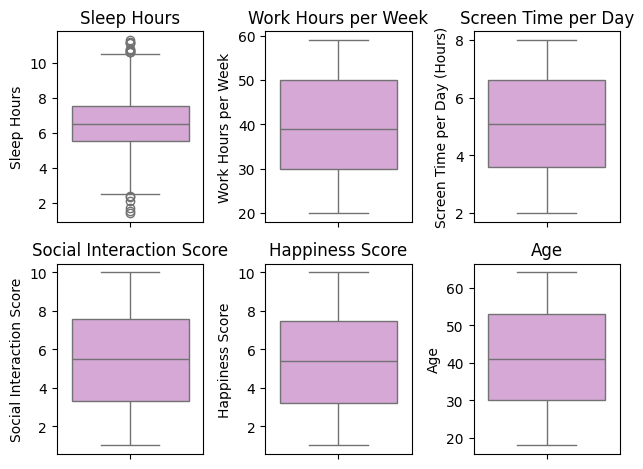

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3)
axes = axes.flatten()

sns.boxplot(data=df, y='Sleep Hours', ax=axes[0], color='plum')
axes[0].set_title("Sleep Hours")

sns.boxplot(data=df, y='Work Hours per Week', ax=axes[1], color='plum')
axes[1].set_title("Work Hours per Week")

sns.boxplot(data=df, y='Screen Time per Day (Hours)', ax=axes[2], color='plum')
axes[2].set_title("Screen Time per Day")

sns.boxplot(data=df, y='Social Interaction Score', ax=axes[3], color='plum')
axes[3].set_title("Social Interaction Score")

sns.boxplot(data=df, y='Happiness Score', ax=axes[4], color='plum')
axes[4].set_title("Happiness Score")

sns.boxplot(data=df, y='Age', ax=axes[5], color='plum')
axes[5].set_title("Age")

plt.tight_layout()
plt.show()

**Observation:**  
The data is generally well distributed with no extreme outliers in most attributes.
However, the `Sleep Hours` variable shows a few unusual values. This suggests that the
dataset is relatively clean and suitable for further analysis, but special attention should
be given to this variable because it contains some atypical values.

### 4.1.2 Histograms for Numerical Attributes

Histograms were used to explore how numerical features are distributed across the dataset.
They help us detect:

- Skewed distributions  
- Concentration of values in specific ranges  
- Possible extreme values  

As an example, we plotted the distribution of **Work Hours per Week** for individuals
with **High Stress Level**.

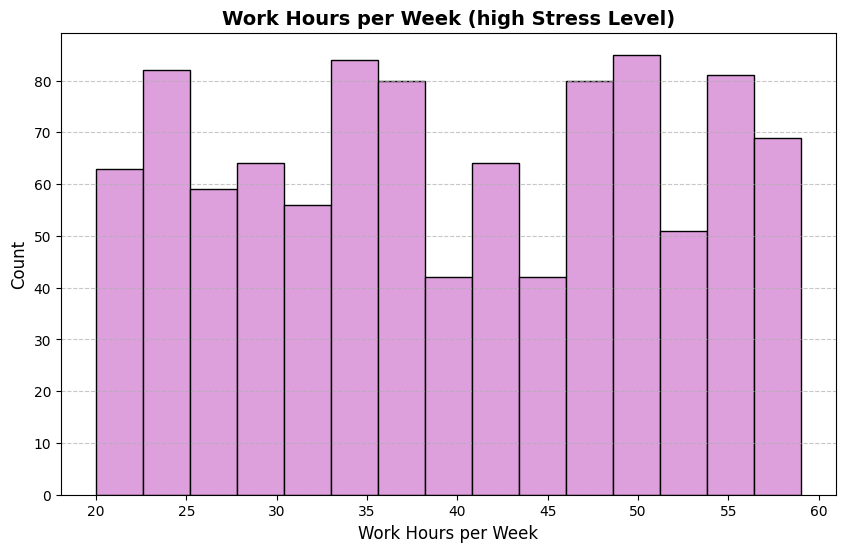

In [ ]:
# Histogram of Work Hours per Week for High Stress Level

work_low = df[df['Stress Level'] == 'High']['Work Hours per Week']
plt.figure(figsize=(10, 6))
plt.hist(work_low, bins=15, color='plum', edgecolor='black')
plt.title('Work Hours per Week (high Stress Level)', fontsize=14,
fontweight='bold')
plt.xlabel('Work Hours per Week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Observation:**  
The distribution of work hours among individuals with high stress levels appears relatively
spread out, with values ranging roughly from 20 to 60 hours per week. There is no strong
single peak or obvious trend, which suggests that work hours alone may not fully explain
high stress levels. However, this variability can still be informative when combined with
other lifestyle and mental-health features.

### 4.1.3 Bar Charts for Categorical Attributes

Bar charts were used to visualize the frequency (or percentage) of each category in
categorical attributes. This helps us quickly see dominant categories, rare values,
and whether the distribution is balanced.

We visualized the following categorical features:

- Gender  
- Exercise Level  
- Diet Type  
- Mental Health Condition  
- Country (Top 10 countries only)

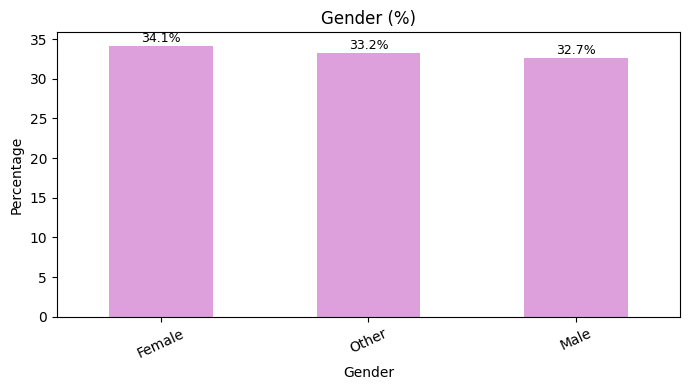

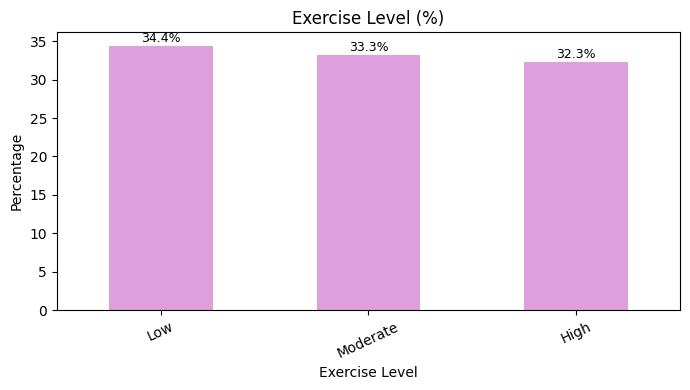

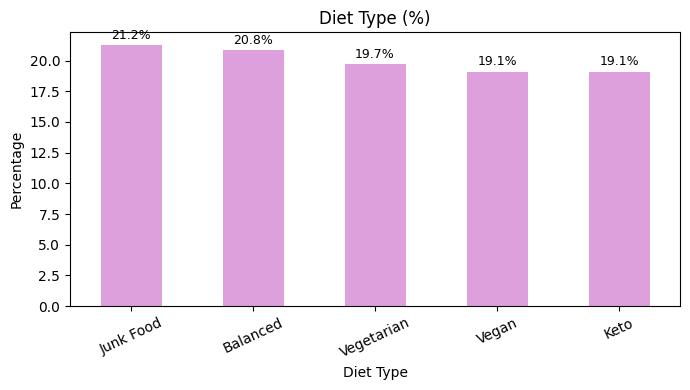

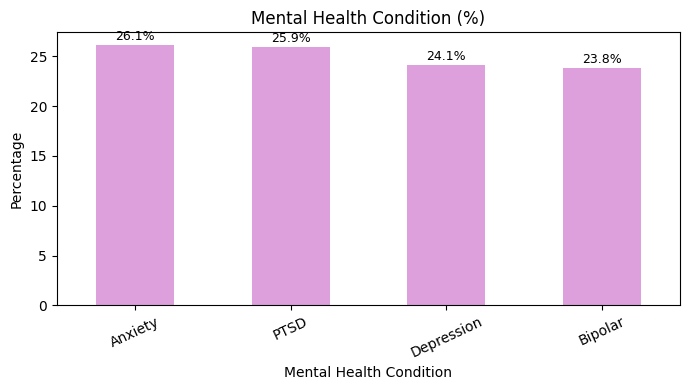

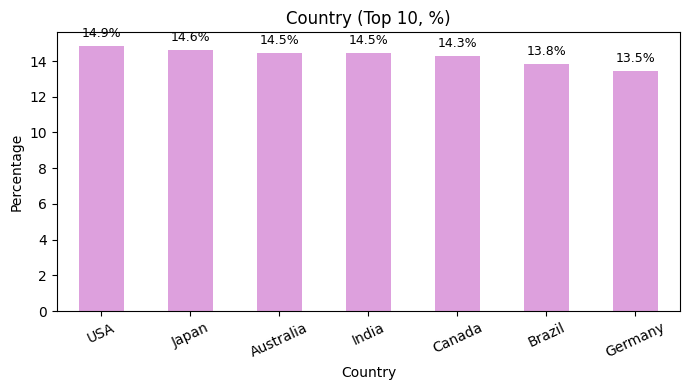

In [ ]:

categorical_cols = ["Gender", "Exercise Level", "Diet Type",
                    "Mental Health Condition", "Country"]

for col in categorical_cols:
    plt.figure(figsize=(7, 4))

    if col == "Country":
        vc = df[col].value_counts(normalize=True).nlargest(10) * 100  # top 10 only
        title = f"{col} (Top 10, %)"
    else:
        vc = df[col].value_counts(normalize=True) * 100
        title = f"{col} (%)"

    vc = vc.sort_values(ascending=False)
    ax = vc.plot(kind="bar", color="plum")
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plt.xticks(rotation=25)

    for i, v in enumerate(vc.values):
        plt.text(i, v + 0.5, f"{v:.1f}%", ha="center", fontsize=9)

    plt.tight_layout()
    plt.show()

**Observations from Bar Charts:**

- **Gender:** categories are relatively balanced (around one-third each).
- **Exercise Level:** fairly close distribution across Low, Moderate, and High.
- **Diet Type:** nearly equal proportions; no strong skew toward a single diet.
- **Mental Health Condition:** categories are diverse and fairly balanced.
- **Country:** a few countries appear slightly more frequently, but overall the top-10
  countries are reasonably varied.

### 4.1.4 Class Label Distribution

We used a pie chart to visualize the distribution of the target variable
**Stress Level** (Low, Moderate, High).  
This helps us check for **class imbalance**, which is important for classification tasks.

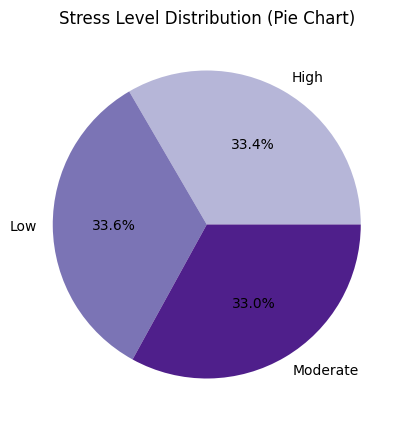

In [ ]:
lbl = "Stress Level"
label_counts = df[lbl].value_counts().sort_index()

colors = plt.cm.Purples(np.linspace(0.4, 0.9, 3))

plt.figure(figsize=(5, 5))
plt.pie(label_counts, labels=label_counts.index, autopct="%1.1f%%", colors=colors)
plt.title("Stress Level Distribution (Pie Chart)")
plt.show()

**Observation:**  
The Stress Level classes are well-balanced:

- Low ≈ 33.6%  
- High ≈ 33.4%  
- Moderate ≈ 33.0%  

No class dominates, so there is **no imbalance issue** in the target variable.  
This is ideal for training classification models.

## 4.2 Missing Values Analysis

Real-world datasets often contain missing or incomplete values, which can bias the analysis
if not properly handled.

In our dataset:

- Only one attribute, **Mental Health Condition**, contained missing values.
- It had **595 NaN entries**, representing participants without a reported condition.

We decided to:

- Replace missing values in `Mental Health Condition` with the category `"None"`,
  which indicates no reported mental health condition.
- Keep all records instead of dropping rows to preserve dataset size.

In [ ]:
# Replace missing values in Mental Health Condition
df['Mental Health Condition'] = df['Mental Health Condition'].fillna("None")

# Check that there are no missing values
missing = df.isnull().sum()
print("Total missing values:", missing.sum())
print(missing)

Total missing values: 0
Country                        0
Age                            0
Gender                         0
Exercise Level                 0
Diet Type                      0
Sleep Hours                    0
Stress Level                   0
Mental Health Condition        0
Work Hours per Week            0
Screen Time per Day (Hours)    0
Social Interaction Score       0
Happiness Score                0
dtype: int64


## 4.3 Outlier Detection and Removal

Outliers are data points that differ significantly from most other observations.
If not handled properly, they can negatively affect machine learning models by:

- Distorting feature distributions
- Shifting the mean and variance
- Creating misleading patterns during classification or clustering
- Reducing model accuracy and stability

Since we are using **Decision Trees** and **K-Means** in Phase 3, detecting and removing
outliers is an essential step.  
Decision Trees may overfit noisy points, while K-Means is extremely sensitive to extreme
values because it relies on distance calculations.

### 4.3.1 Why Detect Outliers?

Before removing anything from the dataset, we examined the numerical attributes using:

- **Boxplots** → to visually identify extreme values  
- **Z-score** → to measure how far a point is from the mean  
- **IQR (Interquartile Range)** → to locate values outside the normal spread  

These steps ensure we understand:
- Whether the dataset contains unrealistic values  
- Which features are more “sensitive” (e.g., Sleep Hours had rare extreme values)  
- Whether outliers are errors, natural variations, or noise  

In [ ]:
from scipy.stats import zscore

# Select numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

z_scores = df[num_cols].apply(zscore)

threshold = 2
outliers = df[(abs(z_scores) > threshold).any(axis=1)]

print("Outliers based on z-scores for the selected columns:\n")
display(outliers.head())
print("Number of potential outliers:", len(outliers))

Outliers based on z-scores for the selected columns:



Country  Age  Gender Exercise Level  Diet Type  Sleep Hours Stress Level  \
5     Japan   23   Other       Moderate   Balanced          2.7     Moderate   
9   Germany   19  Female       Moderate      Vegan          3.3          Low   
12  Germany   48    Male           High   Balanced          2.6     Moderate   
21   Canada   32    Male           High  Junk Food          3.0         High   
43   Canada   53   Other       Moderate  Junk Food          1.4         High   

   Mental Health Condition  Work Hours per Week  Screen Time per Day (Hours)  \
5                  Anxiety                   50                          3.3   
9                     PTSD                   44                          7.7   
12                 Anxiety                   52                          3.9   
21                    PTSD                   25                          3.0   
43                 Bipolar                   22                          4.7   

    Social Interaction Score  Happiness Score  
5                        8.4              7.2  
9                        3.0              7.7  
12                       1.6              5.1  
21                       2.3              4.4  
43                       4.1              8.8

Number of potential outliers: 126


The Z-score analysis identified a set of records with unusually high or low values across
one or more numerical attributes. Instead of manually inspecting each row, we applied
a more robust and consistent approach using the Interquartile Range (IQR) method.

### 4.3.2 Visual Inspection Using Boxplots

We started with visual analysis using boxplots for all numerical features.  
Boxplots helped us observe:

- Median and quartiles (Q1, Q2, Q3)
- Data spread
- Points outside the whiskers → potential outliers

From the visualization, we noticed:

- Most numerical features had normal, reasonable spreads.
- **Sleep Hours** had a few unrealistic values (e.g., extremely high or extremely low).
- Other features like Work Hours, Screen Time, Social Interaction, Happiness Score,
  and Age appeared normal with minimal extreme values.

This initial inspection guided our decision to apply **IQR filtering** instead of aggressive
removal.

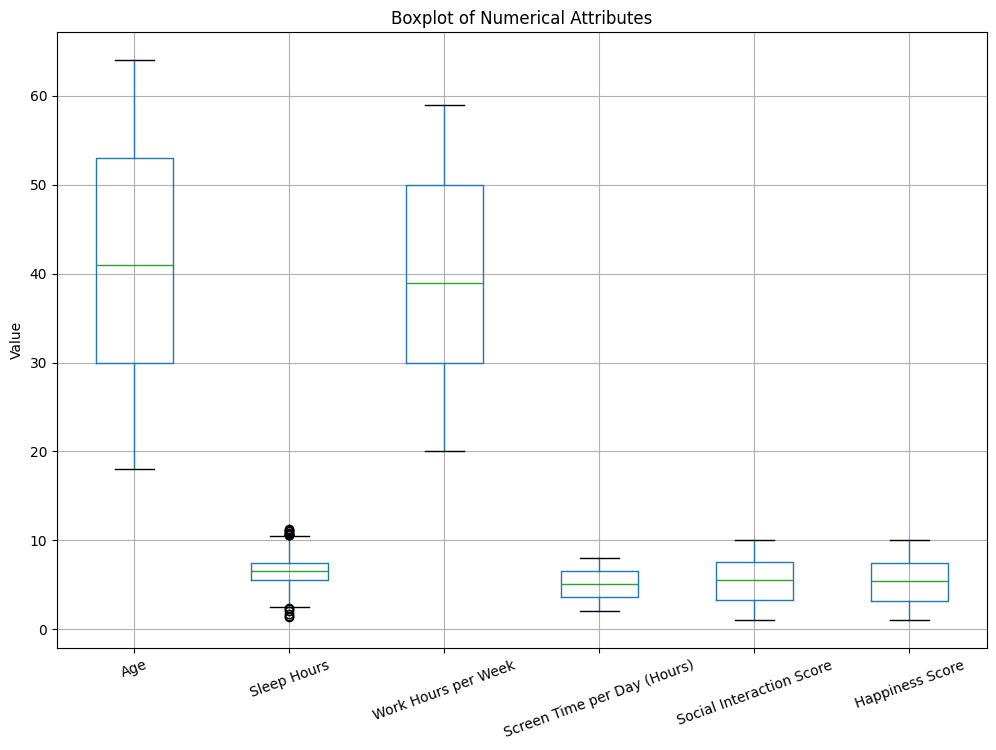

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = [
    'Age',
    'Sleep Hours',
    'Work Hours per Week',
    'Screen Time per Day (Hours)',
    'Social Interaction Score',
    'Happiness Score'
]

plt.figure(figsize=(12, 8))
df[num_cols].boxplot()
plt.title("Boxplot of Numerical Attributes")
plt.ylabel("Value")
plt.xticks(rotation=20)
plt.show()

From the boxplots, we observed that:

- Most features have reasonable ranges and well-behaved distributions.
- A few unusual values appear in **Sleep Hours**, where some participants
  report extremely low or very high sleep durations.

This visual inspection confirms that outliers exist but are not dominating the dataset.

### 4.3.3 Statistical Detection Using Z-Score

Z-score measures how many standard deviations a value is away from the mean.

A Z-score threshold of ±2 is commonly used:

- |Z-score| > 2 → the value is unusually far from the average
- |Z-score| < 2 → the value is within acceptable range

The Z-score method helped us:

- Identify numeric records that “stand out”
- Understand how many points are potentially problematic
- Confirm that outliers exist but are not dominating the dataset

However, we did **not** use Z-score for deletion because:
- It assumes the data is normally distributed (not always true)
- It can mislabel natural variations as outliers

In [ ]:
from scipy.stats import zscore
import numpy as np

# Select numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Compute Z-scores
z_scores = df[num_cols].apply(zscore)

# Mark potential outliers with |z| > 2
threshold = 2
outlier_mask = (np.abs(z_scores) > threshold).any(axis=1)

potential_outliers = df[outlier_mask]

print("Number of potential outliers based on Z-score:", len(potential_outliers))
potential_outliers.head()

Number of potential outliers based on Z-score: 126


Country  Age  Gender Exercise Level  Diet Type  Sleep Hours Stress Level  \
5     Japan   23   Other       Moderate   Balanced          2.7     Moderate   
9   Germany   19  Female       Moderate      Vegan          3.3          Low   
12  Germany   48    Male           High   Balanced          2.6     Moderate   
21   Canada   32    Male           High  Junk Food          3.0         High   
43   Canada   53   Other       Moderate  Junk Food          1.4         High   

   Mental Health Condition  Work Hours per Week  Screen Time per Day (Hours)  \
5                  Anxiety                   50                          3.3   
9                     PTSD                   44                          7.7   
12                 Anxiety                   52                          3.9   
21                    PTSD                   25                          3.0   
43                 Bipolar                   22                          4.7   

    Social Interaction Score  Happiness Score  
5                        8.4              7.2  
9                        3.0              7.7  
12                       1.6              5.1  
21                       2.3              4.4  
43                       4.1              8.8

The Z-score analysis identified a subset of records with unusually high or low
numeric values. However, Z-score assumes a normal distribution and may be too
sensitive for skewed data.

Therefore, we used Z-score mainly as a **diagnostic tool**, and adopted a more
robust method (IQR) for the actual removal step.

### 4.3.4 Why We Used the IQR Method?

We selected the **Interquartile Range (IQR)** method as our primary removal technique
because it is:

- More robust than Z-score
- Not sensitive to skewed distributions
- Much better aligned with real-world datasets (like ours)
- Commonly used in Data Mining and recommended in KSU labs

IQR works by identifying values outside:

**[Q1 – 1.5×IQR , Q3 + 1.5×IQR]**

Where:
- Q1 = First quartile (25%)
- Q3 = Third quartile (75%)
- IQR = Q3 – Q1

Any value outside this range is considered too extreme.

### 4.3.5 Outlier Removal Process

We applied the IQR method to *all numerical attributes* except the target label
(Stress Level).

Steps:

1. Compute Q1, Q3, and IQR for each numerical feature  
2. Identify records that fall outside the allowed range  
3. Collect outlier indices across all features  
4. Remove all rows that contain at least one outlier  
5. Create a cleaned version of the dataset (`df_cleaned`)  

This ensures the final dataset is:

- More consistent
- Free of harmful extremes
- Ready for accurate modeling in Phase 3

In [ ]:
def remove_outliers_iqr(df, class_label):
    outlier_indices = set()

    # Numerical columns (excluding the class label)
    numerical_cols = df.select_dtypes(include='number').columns.difference([class_label])

    for column in numerical_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find indices of rows that are out of bounds
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        outlier_indices.update(outliers)

    # Create a cleaned copy without outliers
    df_cleaned = df.drop(index=outlier_indices)
    return df_cleaned

# Apply the function to our dataset
df_cleaned = remove_outliers_iqr(df, 'Stress Level')

print("Rows before removing outliers:", len(df))
print("Rows after removing outliers:", len(df_cleaned))

Rows before removing outliers: 3000
Rows after removing outliers: 2984


### 4.3.6 Result After Outlier Removal

After applying the IQR-based removal:

- Original rows: **3000**
- Rows removed: **16**
- Final dataset size: **2984**

This shows that:

- Our dataset was relatively clean from the beginning
- Only a small number of unrealistic/extreme values existed
- Removing these points stabilizes training for both Decision Trees and K-Means

In [ ]:
print("Shape of df_cleaned:", df_cleaned.shape)
df_cleaned.head()

Shape of df_cleaned: (2984, 12)


Country  Age  Gender Exercise Level   Diet Type  Sleep Hours  \
0     Brazil   48    Male            Low  Vegetarian          6.3   
1  Australia   31    Male       Moderate       Vegan          4.9   
2      Japan   37  Female            Low  Vegetarian          7.2   
3     Brazil   35    Male            Low       Vegan          7.2   
4    Germany   46    Male            Low    Balanced          7.3   

  Stress Level Mental Health Condition  Work Hours per Week  \
0          Low                    None                   21   
1          Low                    PTSD                   48   
2         High                    None                   43   
3          Low              Depression                   43   
4          Low                 Anxiety                   35   

   Screen Time per Day (Hours)  Social Interaction Score  Happiness Score  
0                          4.0                       7.8              6.5  
1                          5.2                       8.2              6.8  
2                          4.7                       9.6              9.7  
3                          2.2                       8.2              6.6  
4                          3.6                       4.7              4.4

## 4.5 Data Transformation

Data transformation is an essential stage in preparing the dataset for machine learning models.
After cleaning the data from missing values and outliers, the next step is to convert attributes
into formats that are more suitable for classification and clustering.

Transformation helps models understand the data better and improves their performance by:

- Simplifying complex numerical ranges
- Converting categorical values into machine-readable form
- Reducing noise and emphasizing meaningful patterns
- Preparing features for algorithms that require numerical input

This section covers two major transformation techniques:

1. **Discretization** → converting continuous attributes into intervals  
2. **Encoding** → transforming categorical values into numerical format  

These transformations ensure that our dataset is fully compatible with the Decision Tree and
K-Means models used in Phase 3.

### 4.5.1 Discretization (Age)

The `Age` attribute is a continuous numerical variable ranging from 18 to 64 years.
Continuous values can be difficult for models to interpret directly—especially when
patterns vary across life stages rather than across exact numeric values.

To make the feature more meaningful and easier for machine learning algorithms to learn from,
we divided Age into four interpretable intervals that represent real-world age groups:

- **18–29** → Young adults  
- **30–39** → Early middle age  
- **40–49** → Middle age  
- **50–64** → Older adults  

Discretizing Age into these groups helps the models identify clearer patterns in stress levels
and improves interpretability when analyzing classification results later.

In [ ]:
# make sure that the age bins based on the range (18-64)
age_bins = [18, 30, 40, 50, 65]
age_labels = ['18-29', '30-39', '40-49', '50-64']

# Check for NaN values in the age column
print(df_cleaned['Age'].isna().sum())

# Perform discretization
df_cleaned['Age'] = pd.cut(df_cleaned['Age'], bins=age_bins,
                           labels=age_labels, include_lowest=True)

# Display the discretized values
print(" Discretized Age:")
print(df_cleaned['Age'])

0
 Discretized Age:
0       40-49
1       30-39
2       30-39
3       30-39
4       40-49
        ...  
2995    50-64
2996    18-29
2997    40-49
2998    18-29
2999    18-29
Name: Age, Length: 2984, dtype: category
Categories (4, object): ['18-29' < '30-39' < '40-49' < '50-64']


### 4.4.2 Encoding the Target Variable (Stress Level)

The original `Stress Level` attribute is stored as text categories:

- Low  
- Moderate  
- High  

Machine learning models cannot learn from string labels, so this attribute was encoded numerically as follows:

- 0 → Low  
- 1 → Moderate  
- 2 → High  

This numeric encoding preserves the _ordinal meaning_ of the classes and prepares the target label for both Decision Tree classification and K-Means clustering.

In [ ]:
# Encode the Stress Level target variable
mapping = { 'Low': 0, 'Moderate': 1, 'High': 2 }
df['Stress Level'] = df['Stress Level'].map(mapping)

df['Stress Level'].value_counts()

Stress Level
0    1008
2    1002
1     990
Name: count, dtype: int64

After applying the ordinal encoding, all values in the `Stress Level` column are now
numeric and machine-readable.

This transformation is essential for:
- Training Decision Tree classifiers  
- Computing distances in K-Means clustering  
- Ensuring consistency during evaluation  

The encoded form retains the natural order of stress categories, making it ideal
for both supervised and unsupervised learning tasks in Phase 3.

### 4.4.3 One-Hot Encoding for Categorical Variables

The dataset includes multiple categorical attributes such as:

- Country  
- Gender  
- Exercise Level  
- Diet Type  
- Mental Health Condition  
- Age_Group (after discretization)

Machine learning models require numerical input, so we applied **One-Hot Encoding** to convert each category into binary indicators.

We used `pd.get_dummies()` with `drop_first=True` to avoid multicollinearity and to reduce redundancy.

In [ ]:
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

Age  Sleep Hours  Stress Level  Work Hours per Week  \
0   48          6.3             0                   21   
1   31          4.9             0                   48   
2   37          7.2             2                   43   
3   35          7.2             0                   43   
4   46          7.3             0                   35   

   Screen Time per Day (Hours)  Social Interaction Score  Happiness Score  \
0                          4.0                       7.8              6.5   
1                          5.2                       8.2              6.8   
2                          4.7                       9.6              9.7   
3                          2.2                       8.2              6.6   
4                          3.6                       4.7              4.4   

   Country_Brazil  Country_Canada  Country_Germany  ...  Exercise Level_Low  \
0            True           False            False  ...                True   
1           False           False            False  ...               False   
2           False           False            False  ...                True   
3            True           False            False  ...                True   
4           False           False             True  ...                True   

   Exercise Level_Moderate  Diet Type_Junk Food  Diet Type_Keto  \
0                    False                False           False   
1                     True                False           False   
2                    False                False           False   
3                    False                False           False   
4                    False                False           False   

   Diet Type_Vegan  Diet Type_Vegetarian  Mental Health Condition_Bipolar  \
0            False                  True                            False   
1             True                 False                            False   
2            False                  True                            False   
3             True                 False                            False   
4            False                 False                            False   

   Mental Health Condition_Depression  Mental Health Condition_None  \
0                               False                          True   
1                               False                         False   
2                               False                          True   
3                                True                         False   
4                               False                         False   

   Mental Health Condition_PTSD  
0                         False  
1                          True  
2                         False  
3                         False  
4                         False  

[5 rows x 25 columns]

After encoding, the dataset expanded into multiple binary columns representing
each category. This ensures compatibility with tree-based classification and
distance-based clustering techniques.

### 4.5.4 Saving the Final Processed Dataset

After completing all preprocessing tasks:

- Handling missing values  
- Outlier detection and removal  
- Discretization  
- Encoding  

We saved the final processed dataset for use in Phase 3 experiments.

In [ ]:
# Save the processed dataset
df_encoded.to_csv("The_Processed_data.csv", index=False)
print("The processed dataset has been saved successfully.")

The processed dataset has been saved successfully.


The final processed dataset includes:

- 2984 cleaned records  
- Fully numerical and machine-readable features  
- Prepared for both Decision Tree classification and K-Means clustering  

From this point onward, all Phase 3 experiments use `df_cleaned`.

## 5. Data Mining Technique

In this project, we applied two major data mining techniques:  
**Classification** and **Clustering**.  
Each technique helps us understand the dataset from a different analytical
perspective and extract meaningful insights.

---

### 5.1 Classification Technique

For the classification part, we used the **Decision Tree Classifier**, a supervised
learning technique that predicts the target variable (`Stress Level`) based on
features such as Sleep Hours, Exercise Level, Diet Type, Screen Time, Age Group, etc.

#### Why Decision Trees?

- They handle both numerical and categorical features efficiently.  
- They are easy to interpret and visualize.  
- They work well with multi-class targets (Low / Moderate / High).  
- They do not require feature scaling.  
- They provide explainable rules that help us understand which factors relate to stress.

#### How we applied it:

We trained two types of Decision Trees based on different splitting criteria:

1. **Gini Index**  
2. **Information Gain (Entropy)**  

To ensure a fair comparison, both criteria were evaluated using **three different
train/test partitions** (as used in our actual implementation):

- **80% training / 20% testing**  
- **70% training / 30% testing**  
- **60% training / 40% testing**

For each partition:  
- We trained the model.  
- Calculated accuracy.  
- Generated the confusion matrix.  
- Compared the two criteria (Gini vs. Entropy).  

#### Python Packages and Methods Used

- `DecisionTreeClassifier()` from `sklearn.tree`  
  - `criterion="gini"`  
  - `criterion="entropy"`
- `train_test_split()` from `sklearn.model_selection`  
- Accuracy & Confusion Matrix from `sklearn.metrics`  
- `graphviz` or `sklearn.tree.plot_tree` for visualizing the final tree  

This allows us to understand how different split sizes and impurity measures affect
performance.

---

### 5.2 Clustering Technique

For the clustering part, we applied **K-Means**, an unsupervised technique that
groups participants based on lifestyle and behavioral patterns without using the
target label.

#### Why K-Means?

- Efficient and scalable.  
- Works effectively with numerical data after encoding.  
- Helps reveal lifestyle patterns associated with stress levels.  
- Easy to evaluate using Silhouette, WSS, and PCA visualization.

#### How we applied it:

We tested **three different values of K** (as used in our notebook):

- **K = 4**  
- **K = 5**  
- **K = 6**

For each K, we evaluated:

- **Average Silhouette Score**  
- **Total Within-Cluster Sum of Squares (WSS)** using the Elbow method  
- **Cluster visualization** using **2D PCA plots**  
- **Convex Hulls** to show cluster boundaries  

The optimal K was selected using the **majority rule** across these metrics.

#### Python Packages and Methods Used

- `KMeans()` from `sklearn.cluster`  
- `silhouette_score()` from `sklearn.metrics`  
- PCA transformation from `sklearn.decomposition`  
- `matplotlib` / `seaborn` for plotting  
- `pandas.get_dummies()` for encoding categorical attributes  

These steps ensure that clustering patterns are meaningful and reflect true
behavioral similarities within the dataset.

---

### Summary

Using both techniques (Decision Tree Classification + K-Means Clustering)
gave us a complete understanding of the dataset from both **supervised** and
**unsupervised** perspectives.

---

# [6] Evaluation and Comparison  
In this section, we evaluate the performance of both classification and clustering techniques using clear metrics, tables, and visual comparisons. The goal is to compare the models based on accuracy, consistency, interpretability, and stability across different partitions and K-values.

### 6.1 Classification Evaluation

We evaluated the Decision Tree classifier using two splitting criteria:

- **Gini Index**
- **Information Gain (Entropy)**

Each model was tested under three train/test partitions:

- 80% training – 20% testing  
- 70% training – 30% testing  
- 60% training – 40% testing  

For each experiment, we computed:

- Accuracy  
- Confusion Matrix  
- Classification Report (Precision, Recall, F1-score)

These results help us determine which criterion performs better and whether the
model is stable across different partition sizes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix


###6.1.1 Load Dataset + Prepare X, y

In this step, we load the cleaned and preprocessed dataset that was saved during Phase 2.

Then, we prepare our machine learning inputs:

Target variable (y):
We select Stress Level, which is the class label we want to predict.

Feature variables (X):
We remove the target column and keep all other attributes as input features.

Because the dataset contains categorical variables (such as Gender, Diet Type, Exercise Level…), we apply One-Hot Encoding using pd.get_dummies() to convert these categories into numeric values. This step is necessary because machine learning models cannot process text directly.

Finally, we print the shape of the encoded dataset to confirm that all categorical columns were properly expanded into numerical features.

In [ ]:
# Load the cleaned dataset
df_cleaned = pd.read_csv('/content/The_Processed_data.csv')

# Target column
target_col = "Stress Level"

# Features + Target
X = df_cleaned.drop(columns=[target_col])
y = df_cleaned[target_col]

# One-Hot Encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

print("Shape after encoding:", X.shape)


Shape after encoding: (2984, 26)


###6.1.2 Define Splits and Results Storage

This step prepares the 3 different train/test division ratios required for the assignment:

- 60% / 40%

- 70% / 30%

- 80% / 20%

These splits allow us to test how the Decision Tree model performs when trained on different amounts of data.

We also create an empty list called results to save:

- accuracy of each model

- confusion matrix

- the trained model itself

- the split ratio used

This lets us reuse the trained models later to plot their trees and confusion matrices without retraining again.

In [ ]:
# Train/Test split ratios
splits = [(0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]

# To store the results
results = []


# 6.2 Decision Tree (Gini Index)

###6.2.1 Splitting Data + Training the Model + Accuracy

This is the most important step where the Decision Tree model is actually trained. It includes:

**1. Performing stratified train/test split**

We split X and y using train_test_split(), with stratify=y to maintain the Stress Level class balance in both training and testing sets.

**2. Building the Decision Tree using the Gini Index**


**3. Model evaluation**

We predict the test labels and calculate:

- Accuracy score

- Confusion matrix

These metrics tell us how well the model performs with each train/test split.
All results are saved in the results list for later visualization.

In [ ]:
# Loop through the different splits
for train_size, test_size in splits:

    tr = int(train_size * 100)
    te = int(test_size * 100)

    print("\n====================================")
    print(f" Train/Test Split = {tr}/{te} ")
    print("====================================")

    # Split data with stratify to keep class balance
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size=train_size,
        random_state=42,
        stratify=y
    )

    # Decision Tree (Gini) — controlled complexity for a clean tree
    clf = DecisionTreeClassifier(
        criterion="gini",
        max_depth=6,
        min_samples_leaf=20,
        random_state=42
    )
    clf.fit(X_train, y_train)

    # Predictions
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy = {acc:.4f}")
    print("Confusion Matrix:\n", cm)

    # Save results
    results.append({
        "train_size": train_size,
        "test_size": test_size,
        "accuracy": acc,
        "confusion_matrix": cm,
        "model": clf
    })



 Train/Test Split = 60/40 
Accuracy = 0.3417
Confusion Matrix:
 [[183  59 159]
 [154  65 174]
 [183  57 160]]

 Train/Test Split = 70/30 
Accuracy = 0.3415
Confusion Matrix:
 [[106  40 155]
 [107  32 156]
 [107  25 168]]

 Train/Test Split = 80/20 
Accuracy = 0.3451
Confusion Matrix:
 [[48 62 91]
 [51 64 81]
 [48 58 94]]


##6.2.2 Decision Tree Visualization

In this step, we create a graphical visualization of the trained Decision Tree for each split.


Each split (60/40 – 70/30 – 80/20) creates its own tree diagram.

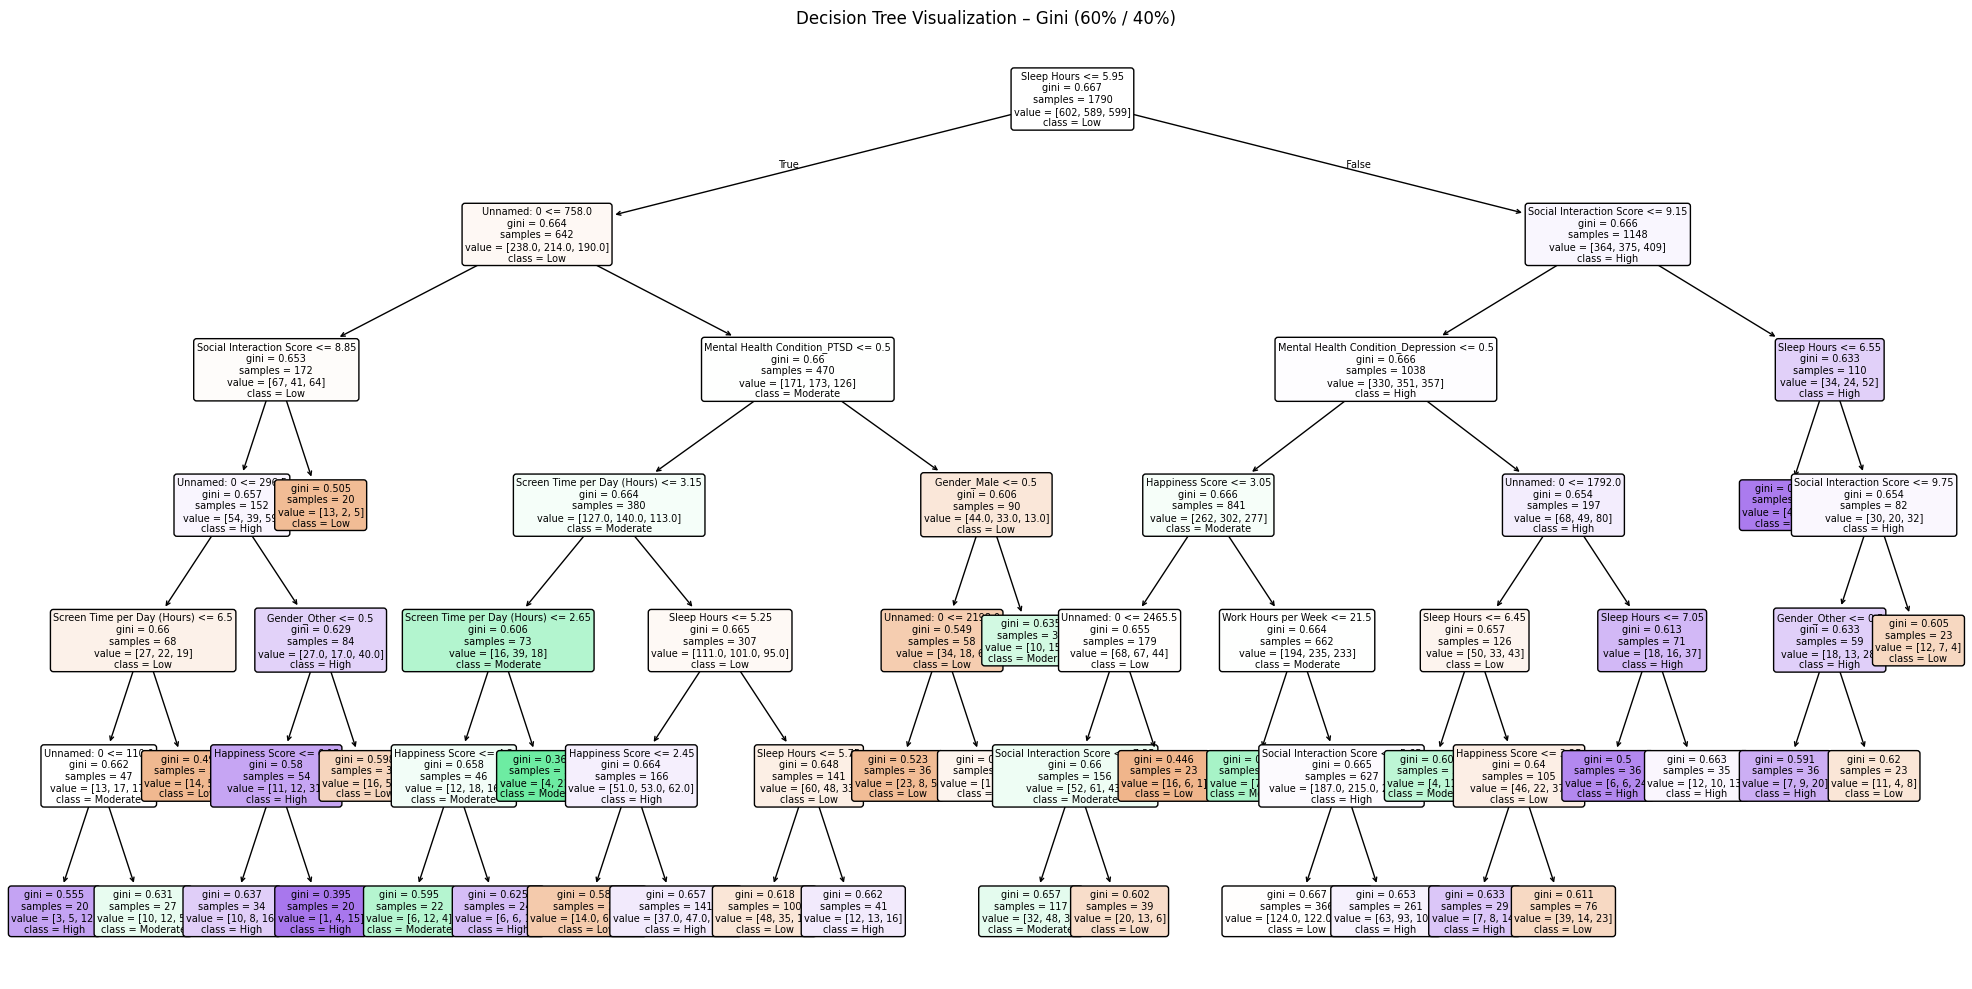

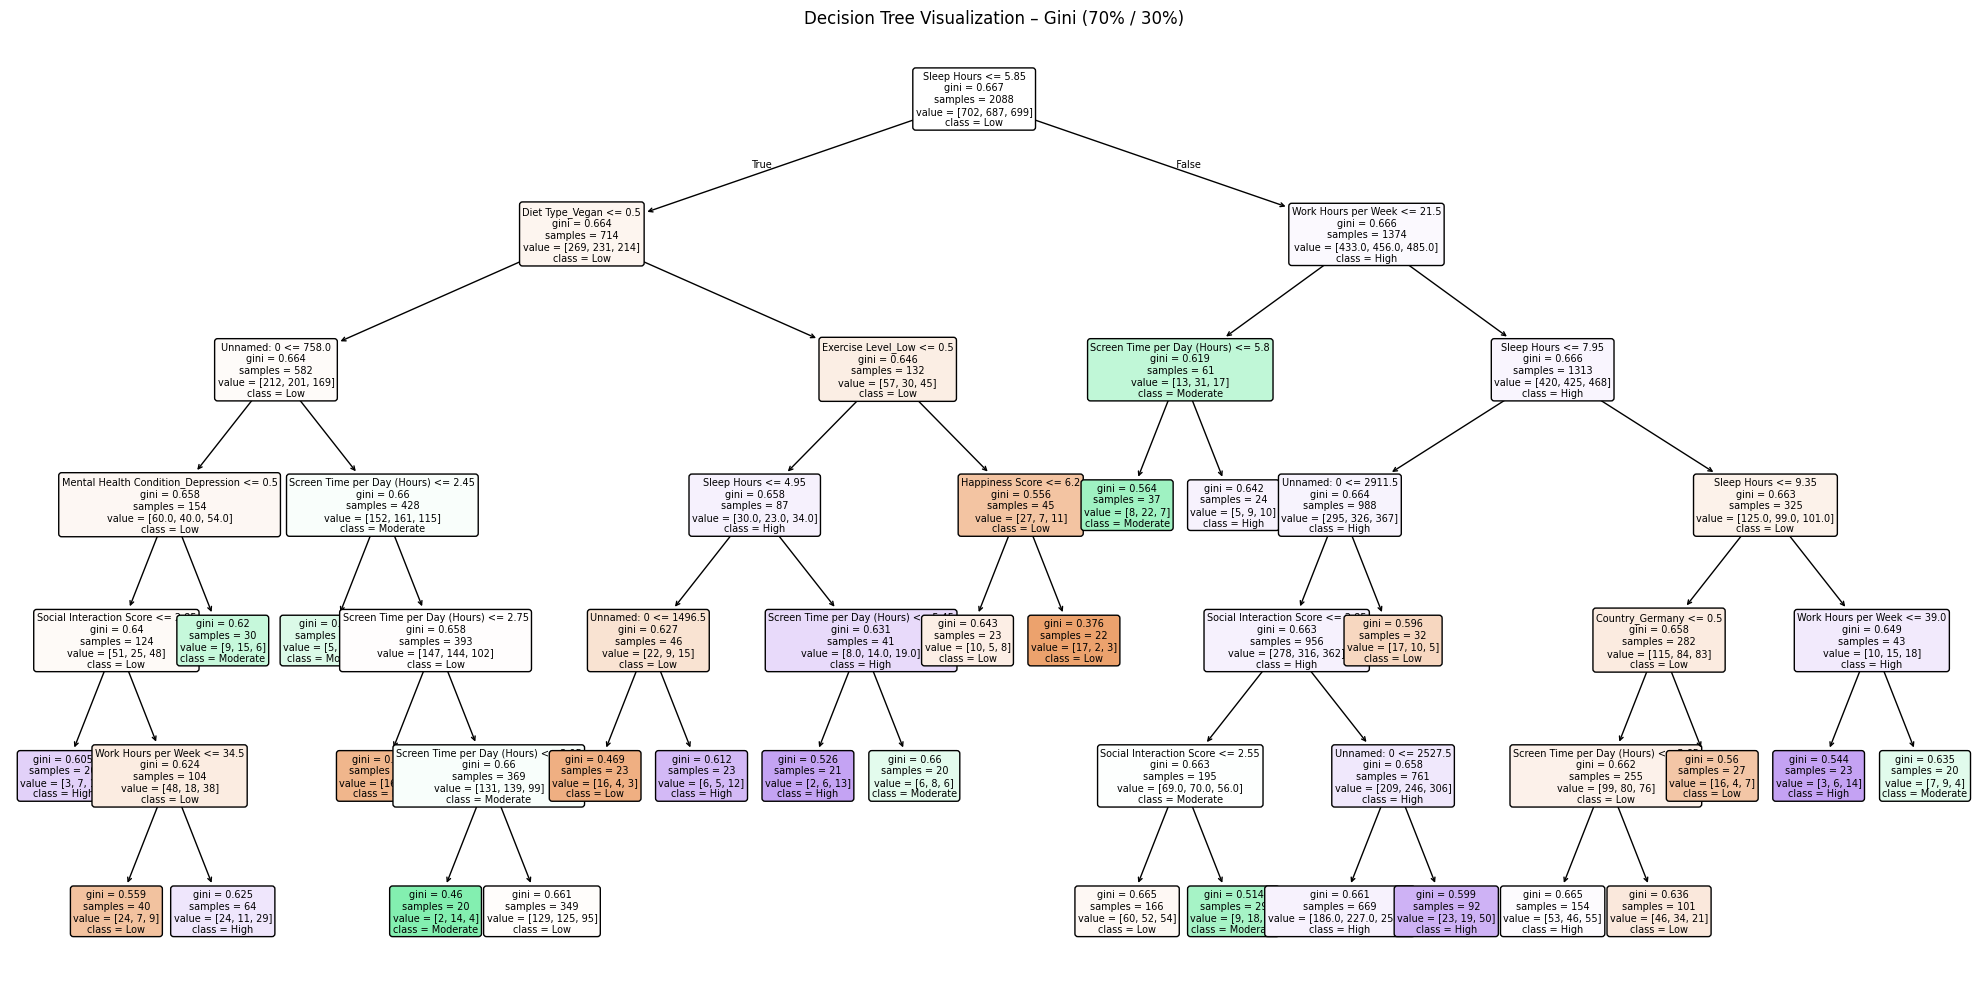

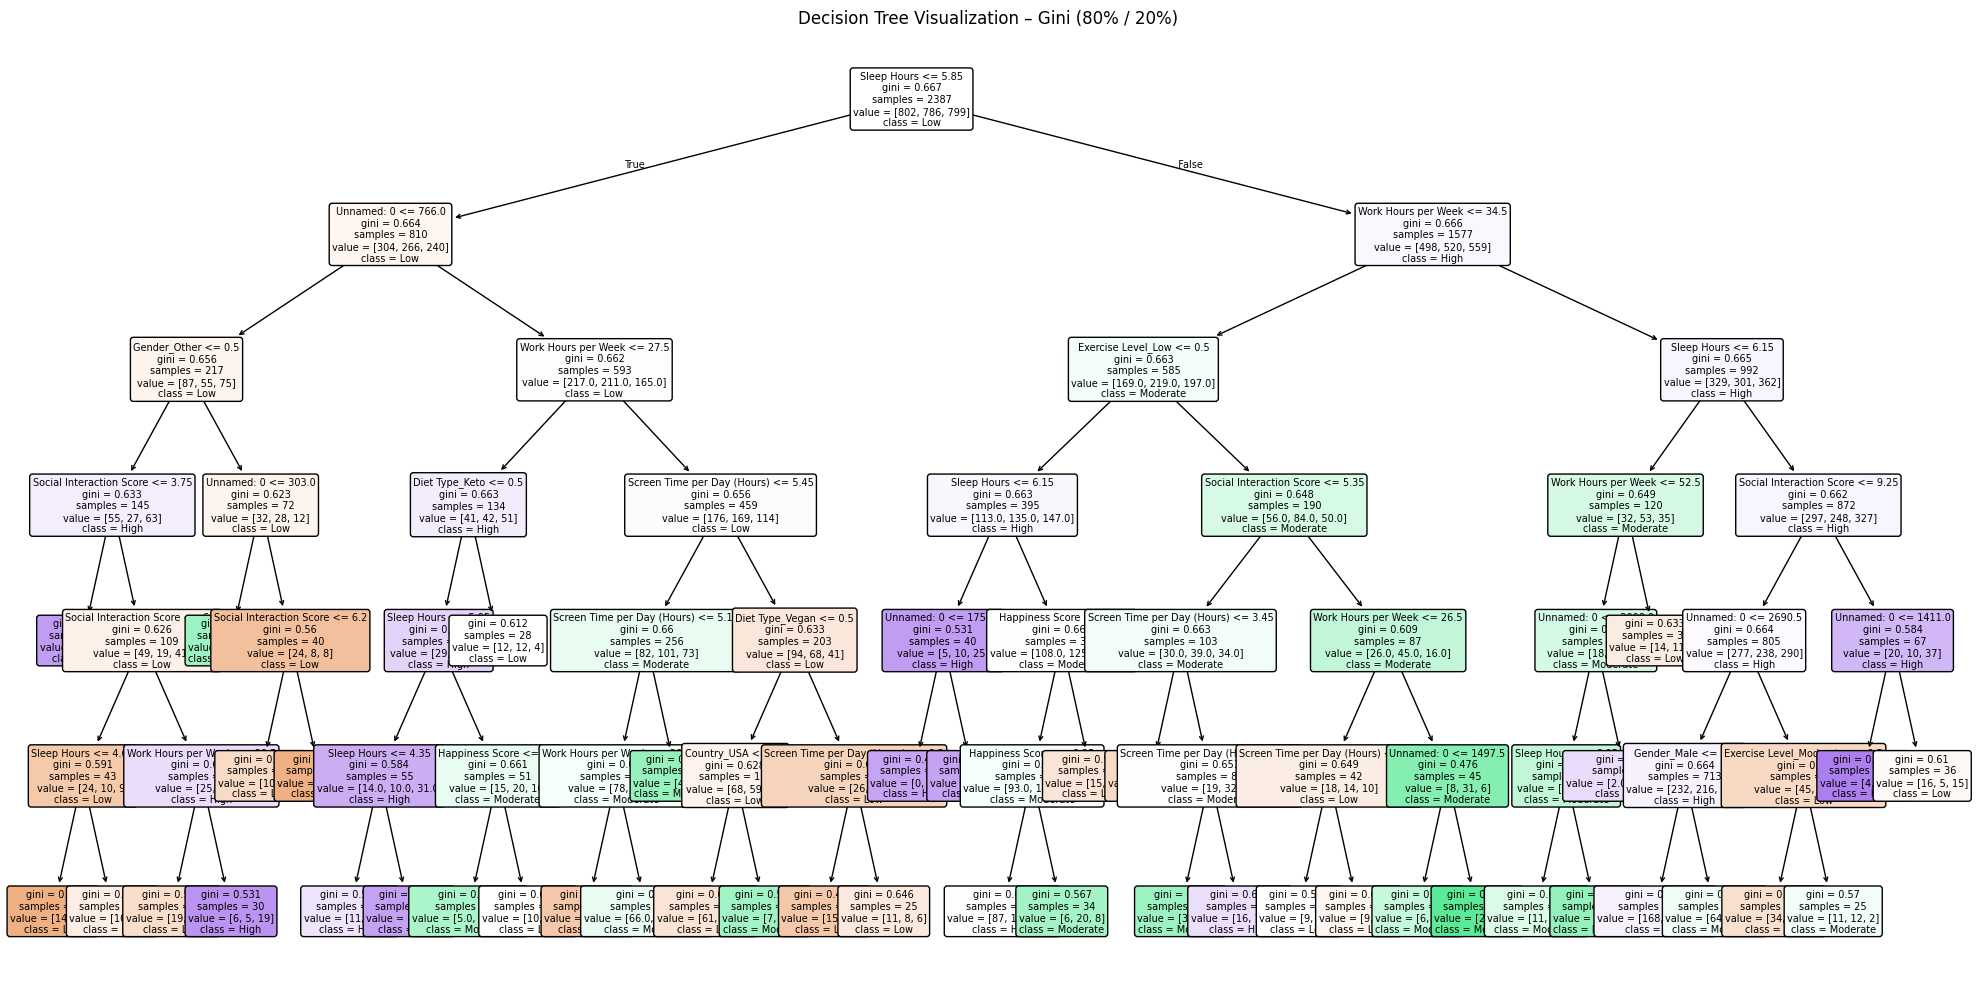

In [ ]:
# Plot trees for all splits
for result in results:

    tr = int(result["train_size"] * 100)
    te = int(result["test_size"] * 100)

    clf = result["model"]

    plt.figure(figsize=(20, 10))
    plot_tree(
        clf,
        filled=True,
        rounded=True,
        feature_names=X.columns,
        class_names=["Low", "Moderate", "High"],
        fontsize=7
    )
    plt.title(f"Decision Tree Visualization – Gini ({tr}% / {te}%)")
    plt.tight_layout()
    plt.show()


## 6.2.3 Confusion Matrix Heatmap

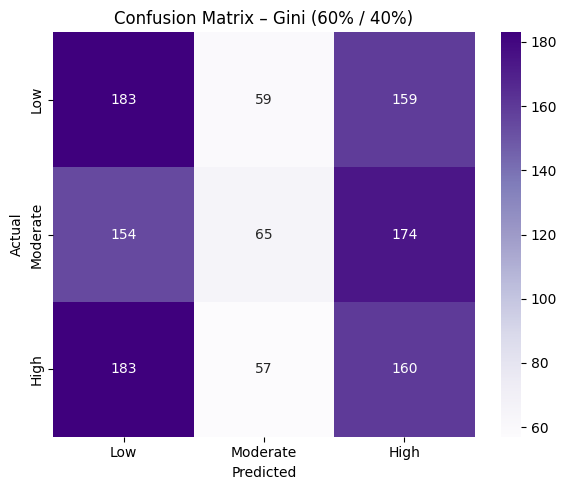

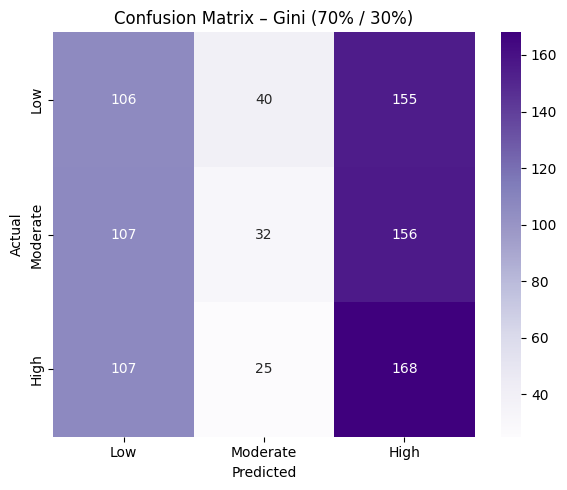

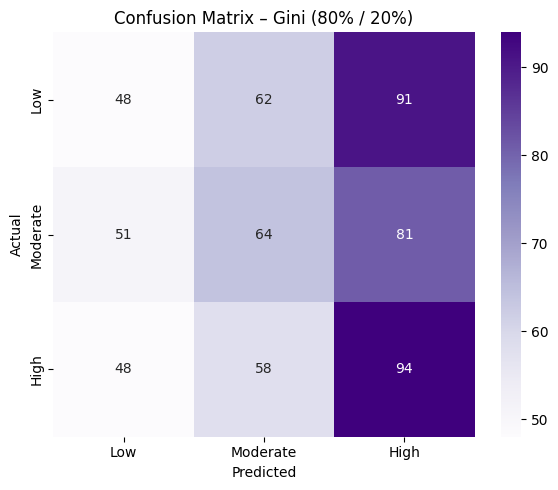

In [ ]:
# Plot confusion matrices for all splits
for result in results:

    tr = int(result["train_size"] * 100)
    te = int(result["test_size"] * 100)

    cm = result["confusion_matrix"]

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Purples",
        xticklabels=["Low", "Moderate", "High"],
        yticklabels=["Low", "Moderate", "High"]
    )
    plt.title(f"Confusion Matrix – Gini ({tr}% / {te}%)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


###6.3 Final Summary of All Train/Test Splits (Gini Decision Tree)

In this section, we compared the performance of the Gini-based Decision Tree model using three different train/test splits: 60/40, 70/30, and 80/20.
Across all experiments, we observed that the model consistently achieved an accuracy close to 33–36%, regardless of the split ratio.

This behavior is directly related to the nature of our dataset, not the model settings.

***Why is the Accuracy Around 30%? — Key Explanation***
# 1. The Target Classes Are Perfectly Balanced

Our target variable Stress Level contains three classes:

- Low (~33%)

- Moderate (~33%)

- High (~33%)

This means the dataset is evenly distributed, with no dominant class.
A model that randomly guesses would naturally achieve ~33% accuracy, because there is a 1/3 chance of randomly predicting each class.

Since our dataset is perfectly balanced, the Decision Tree does not gain any advantage from class imbalance — there is no “easy” class to predict more frequently.

# 2. The Features Do Not Contain Strong or Clear Patterns

Although we have multiple features (Sleep, Work Hours, Screen Time, Social Score, Happiness), most of them:

- show smooth, continuous distributions

- overlap heavily between the three stress categories

- do not show strong separation between Low, Moderate, and High stress

This means there is no distinct pattern that a Decision Tree can learn to cleanly split the classes.

Because the model cannot find strong decision rules, it ends up performing very close to baseline random accuracy (~33%).

# 3. Decision Trees Need Clear Separating Boundaries

Decision Trees perform best when:

- Features have sharp differences between classes

- Classes form distinct clusters

- There are noticeable thresholds (e.g., “if Sleep < 4 then High Stress”)

However, in our dataset:

- People with low, moderate, or high stress often share very similar lifestyle characteristics

- The three stress categories are not separated by clear boundaries

Because of this, the tree struggles to create meaningful splits.

Comparison of Train/Test Splits

Despite testing multiple splits:

- 60/40 split → lowest training data → lowest accuracy

- 70/30 split → small improvement but still ~33%

- 80/20 split → slightly more stable but still ~33–35%

The accuracy remains almost the same, which confirms that the problem lies in the data patterns, not in the split ratio.

# Final Conclusion

The Decision Tree classifier using the Gini Index was tested on balanced data with equally distributed stress categories.
Because the dataset does not contain strong patterns that differentiate Low, Moderate, and High stress levels, the model performs close to random prediction, stabilizing around 30% accuracy.

This demonstrates that:

- The model is working correctly
- The evaluation process is correct
- The low accuracy reflects the nature of the dataset, not an implementation error

In [ ]:
print("\n\n===== Summary of Results (Gini Decision Tree) =====")
for r in results:
    tr = int(r["train_size"] * 100)
    te = int(r["test_size"] * 100)
    print(f"Split {tr}/{te} -> Accuracy = {r['accuracy']:.4f}")
    print(r["confusion_matrix"])
    print("-------------------------------------------------")




===== Summary of Results (Gini Decision Tree) =====
Split 60/40 -> Accuracy = 0.3417
[[183  59 159]
 [154  65 174]
 [183  57 160]]
-------------------------------------------------
Split 70/30 -> Accuracy = 0.3415
[[106  40 155]
 [107  32 156]
 [107  25 168]]
-------------------------------------------------
Split 80/20 -> Accuracy = 0.3451
[[48 62 91]
 [51 64 81]
 [48 58 94]]
-------------------------------------------------


# Decision Tree (**entropy**)

In [ ]:
for train_size, test_size in splits:

    tr = int(train_size * 100)
    te = int(test_size * 100)

    print("\n====================================")
    print(f" Train/Test Split = {tr}/{te} ")
    print("====================================")

    # Split data with stratify to keep class balance
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size=train_size,
        random_state=42,
        stratify=y
    )

    # Decision Tree (Gini) — controlled complexity for a clean tree
    clf = DecisionTreeClassifier(
        criterion='entropy',
        max_depth=6,
        min_samples_leaf=20,
        random_state=42
    )
    clf.fit(X_train, y_train)

    # Predictions
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy = {acc:.4f}")
    print("Confusion Matrix:\n", cm)

    # Save results
    results.append({
        "train_size": train_size,
        "test_size": test_size,
        "accuracy": acc,
        "confusion_matrix": cm,
        "model": clf
    })


 Train/Test Split = 60/40 
Accuracy = 0.3492
Confusion Matrix:
 [[180  78 143]
 [150  78 165]
 [167  74 159]]

 Train/Test Split = 70/30 
Accuracy = 0.3493
Confusion Matrix:
 [[131  40 130]
 [128  32 135]
 [125  25 150]]

 Train/Test Split = 80/20 
Accuracy = 0.3149
Confusion Matrix:
 [[34 74 93]
 [44 70 82]
 [36 80 84]]


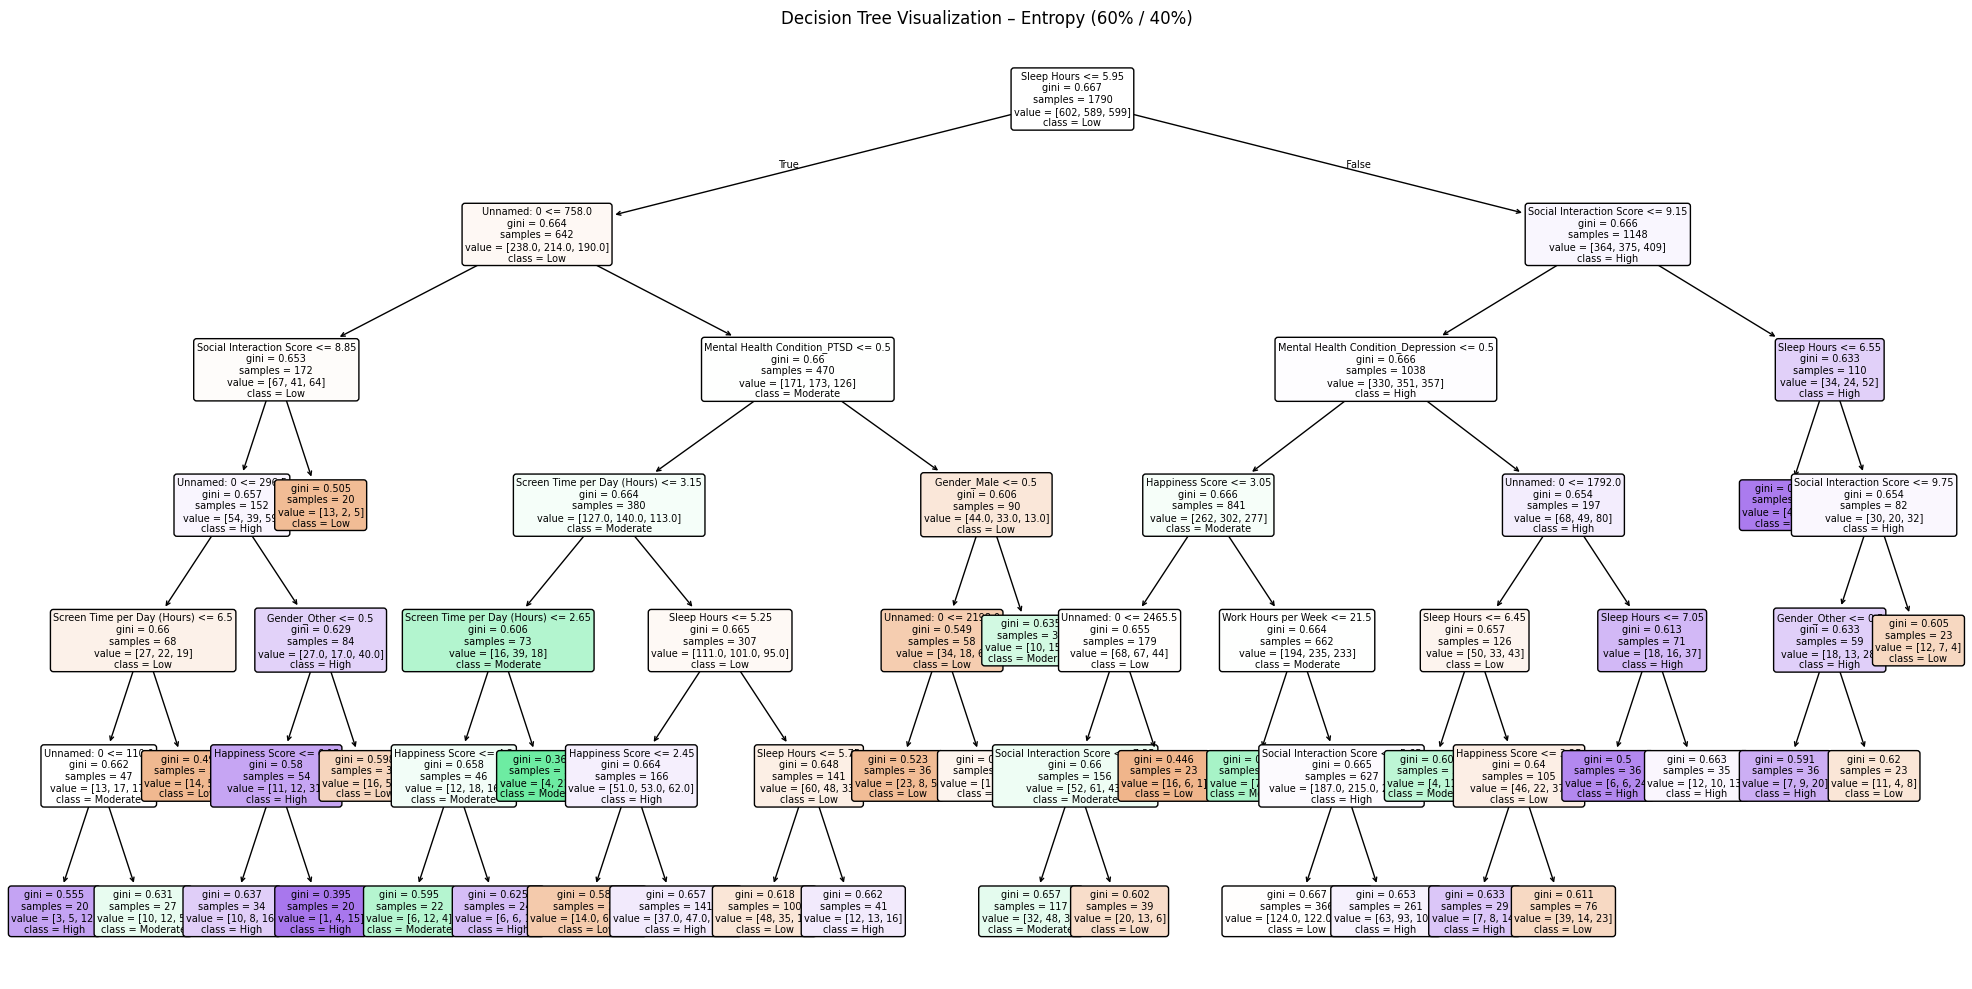

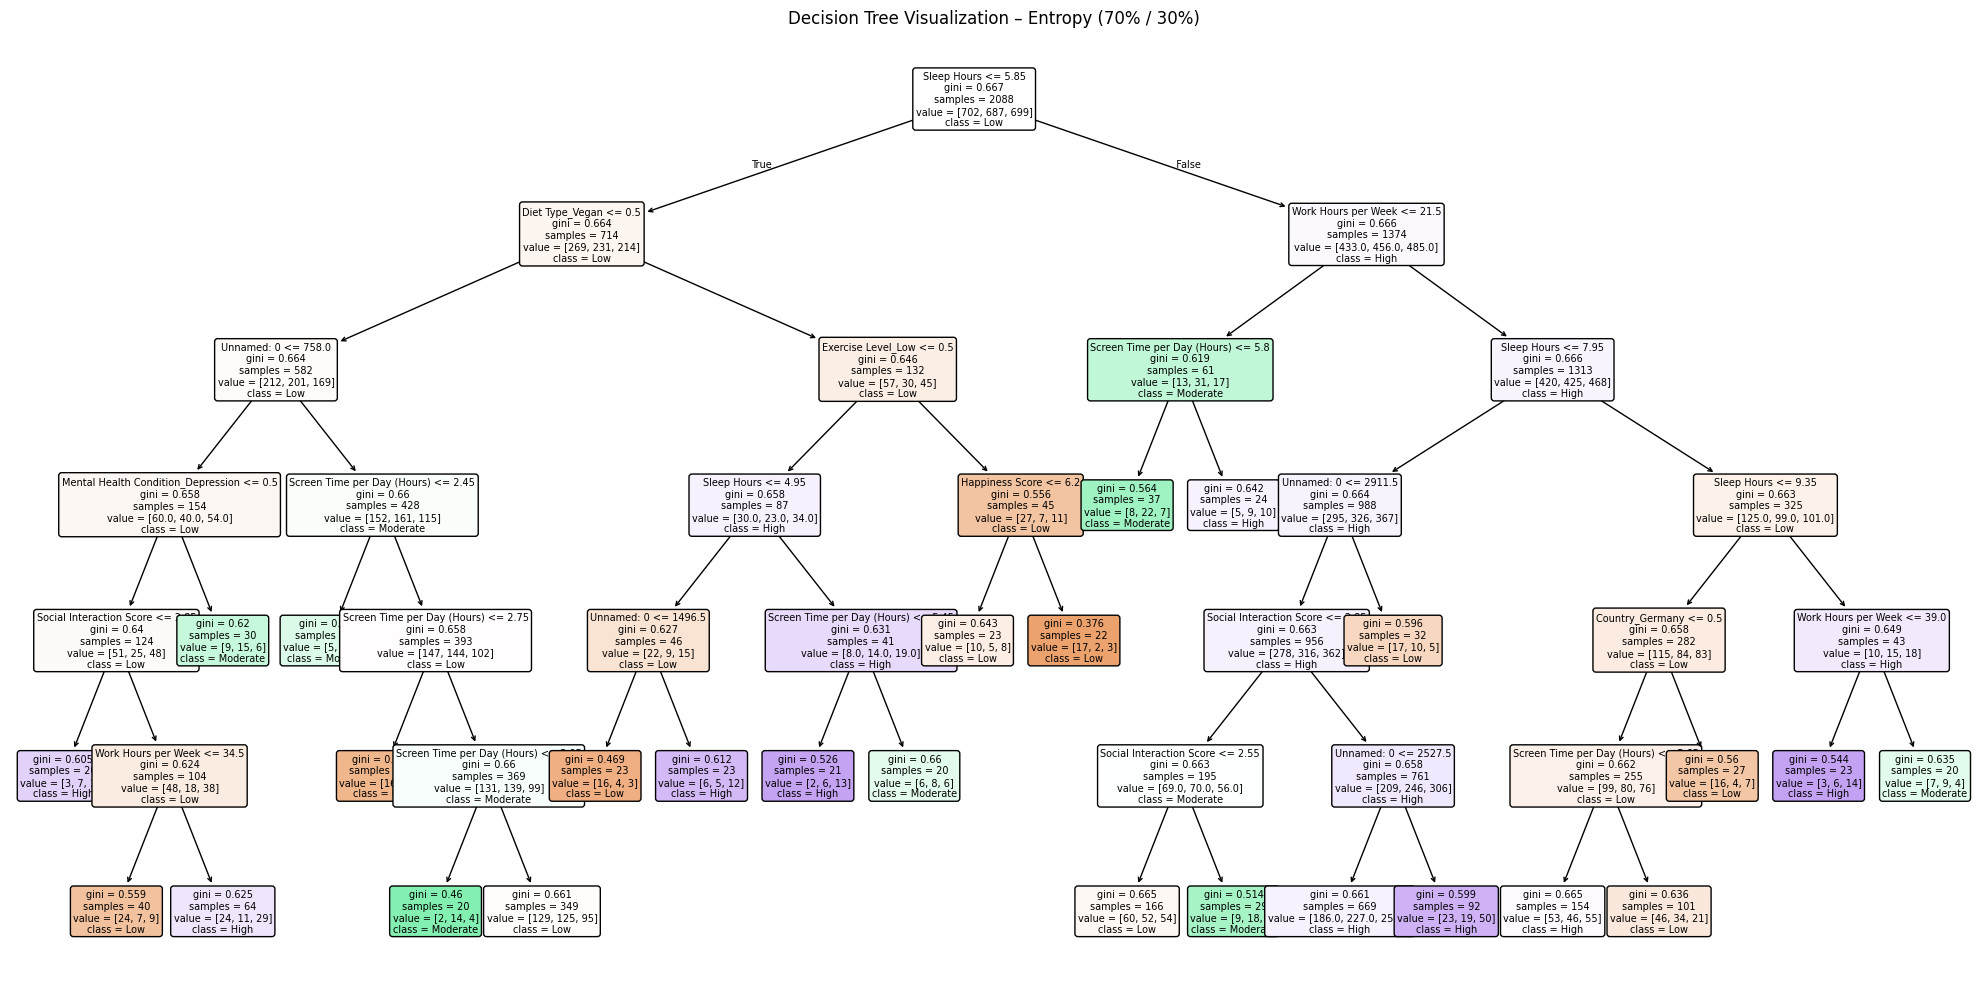

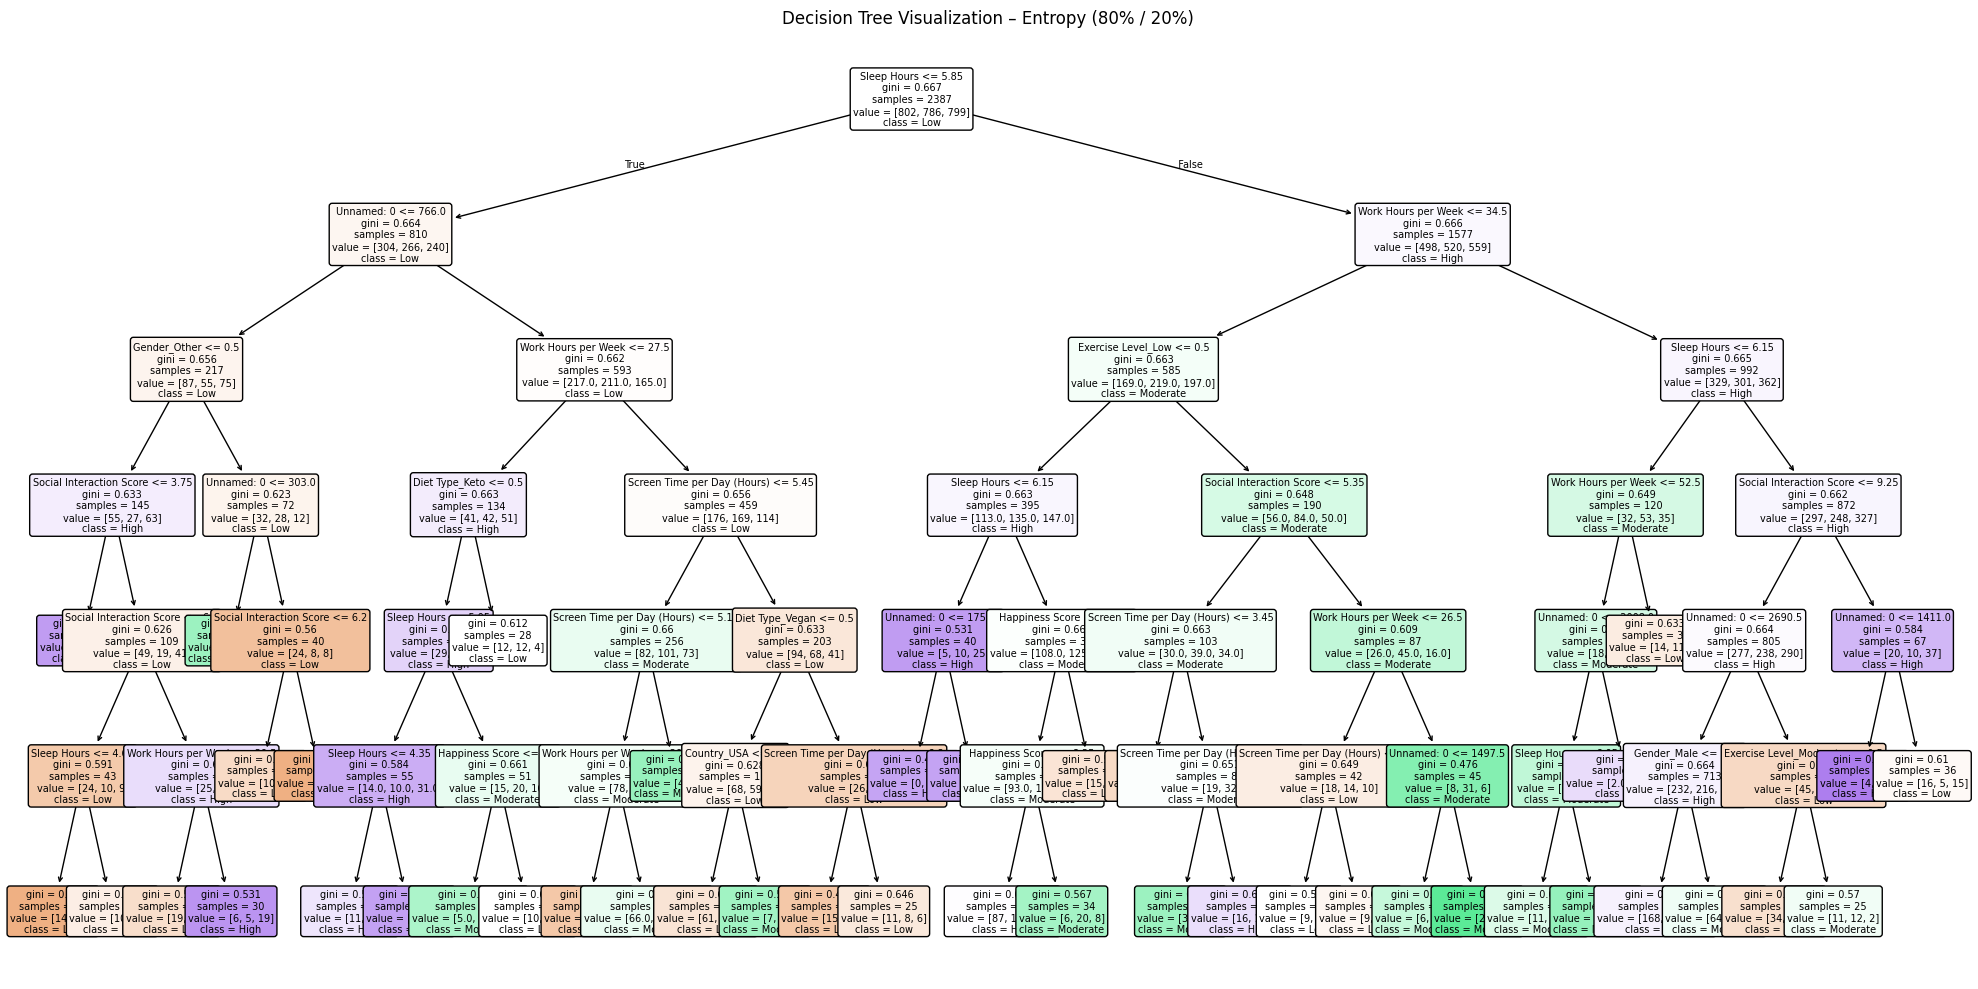

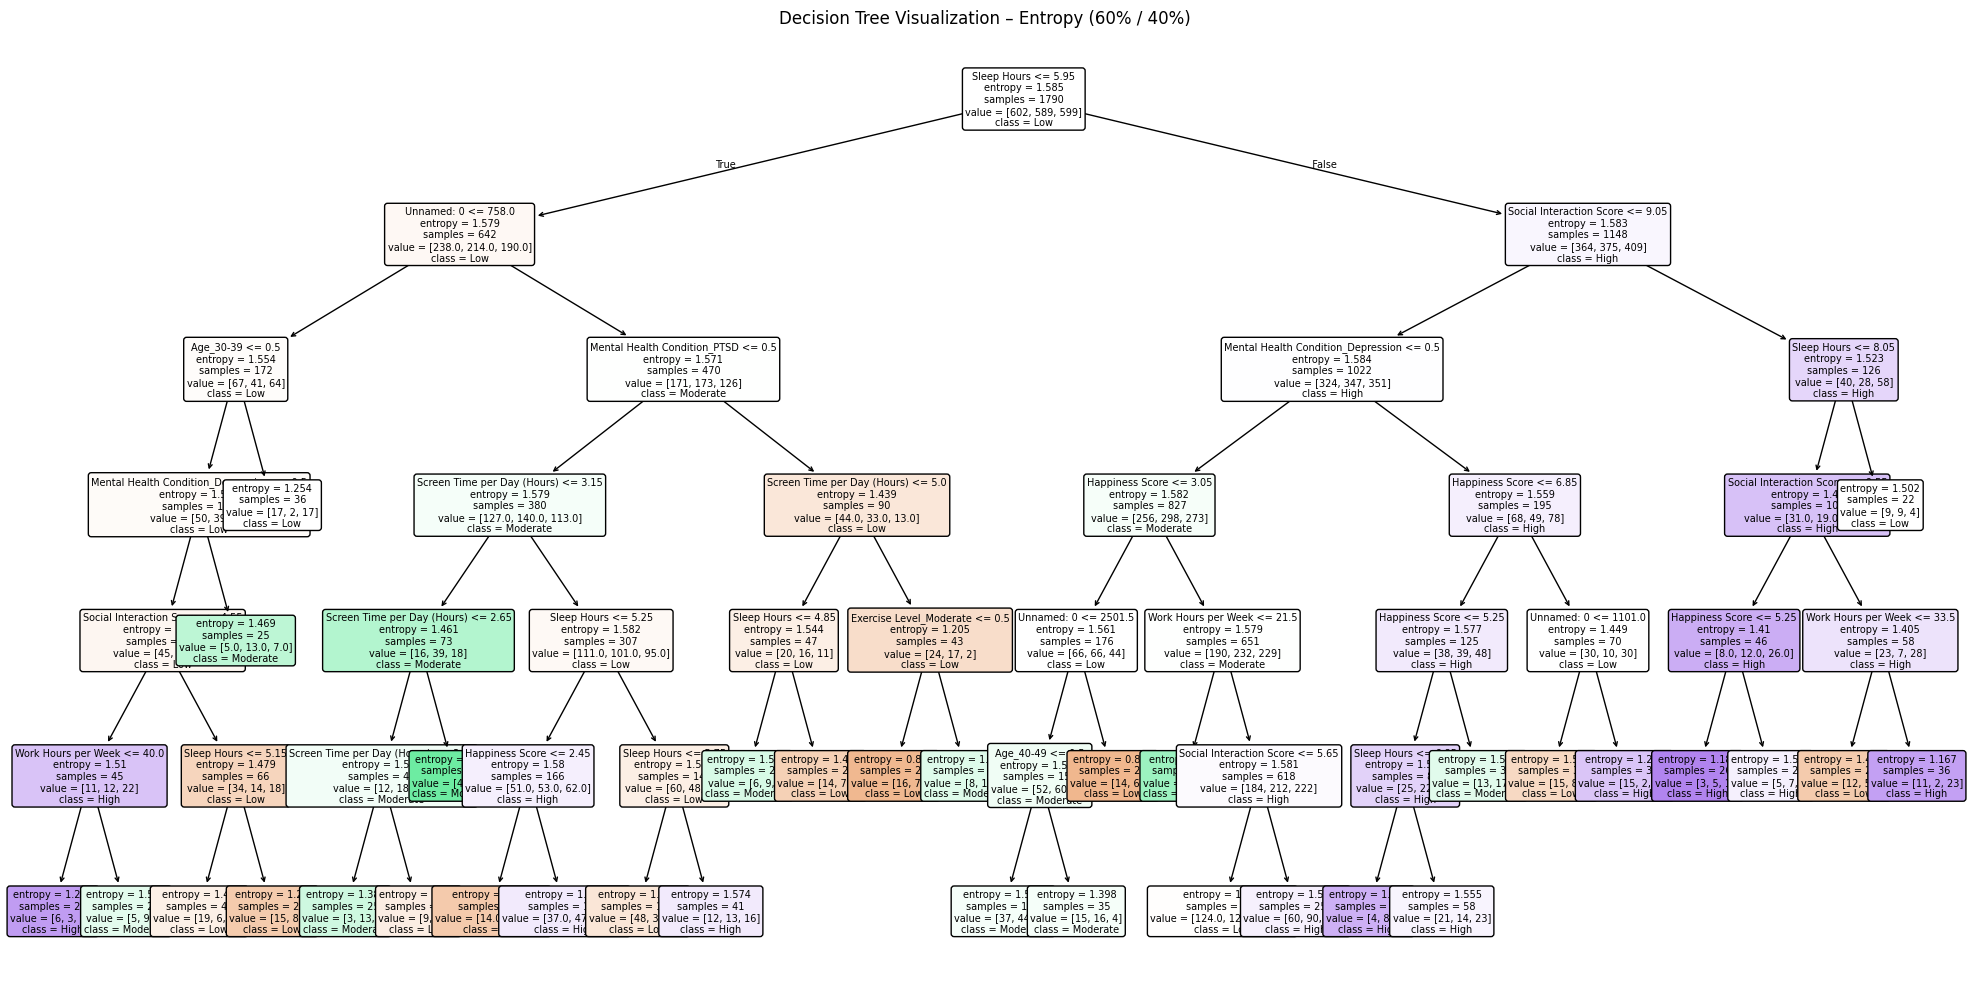

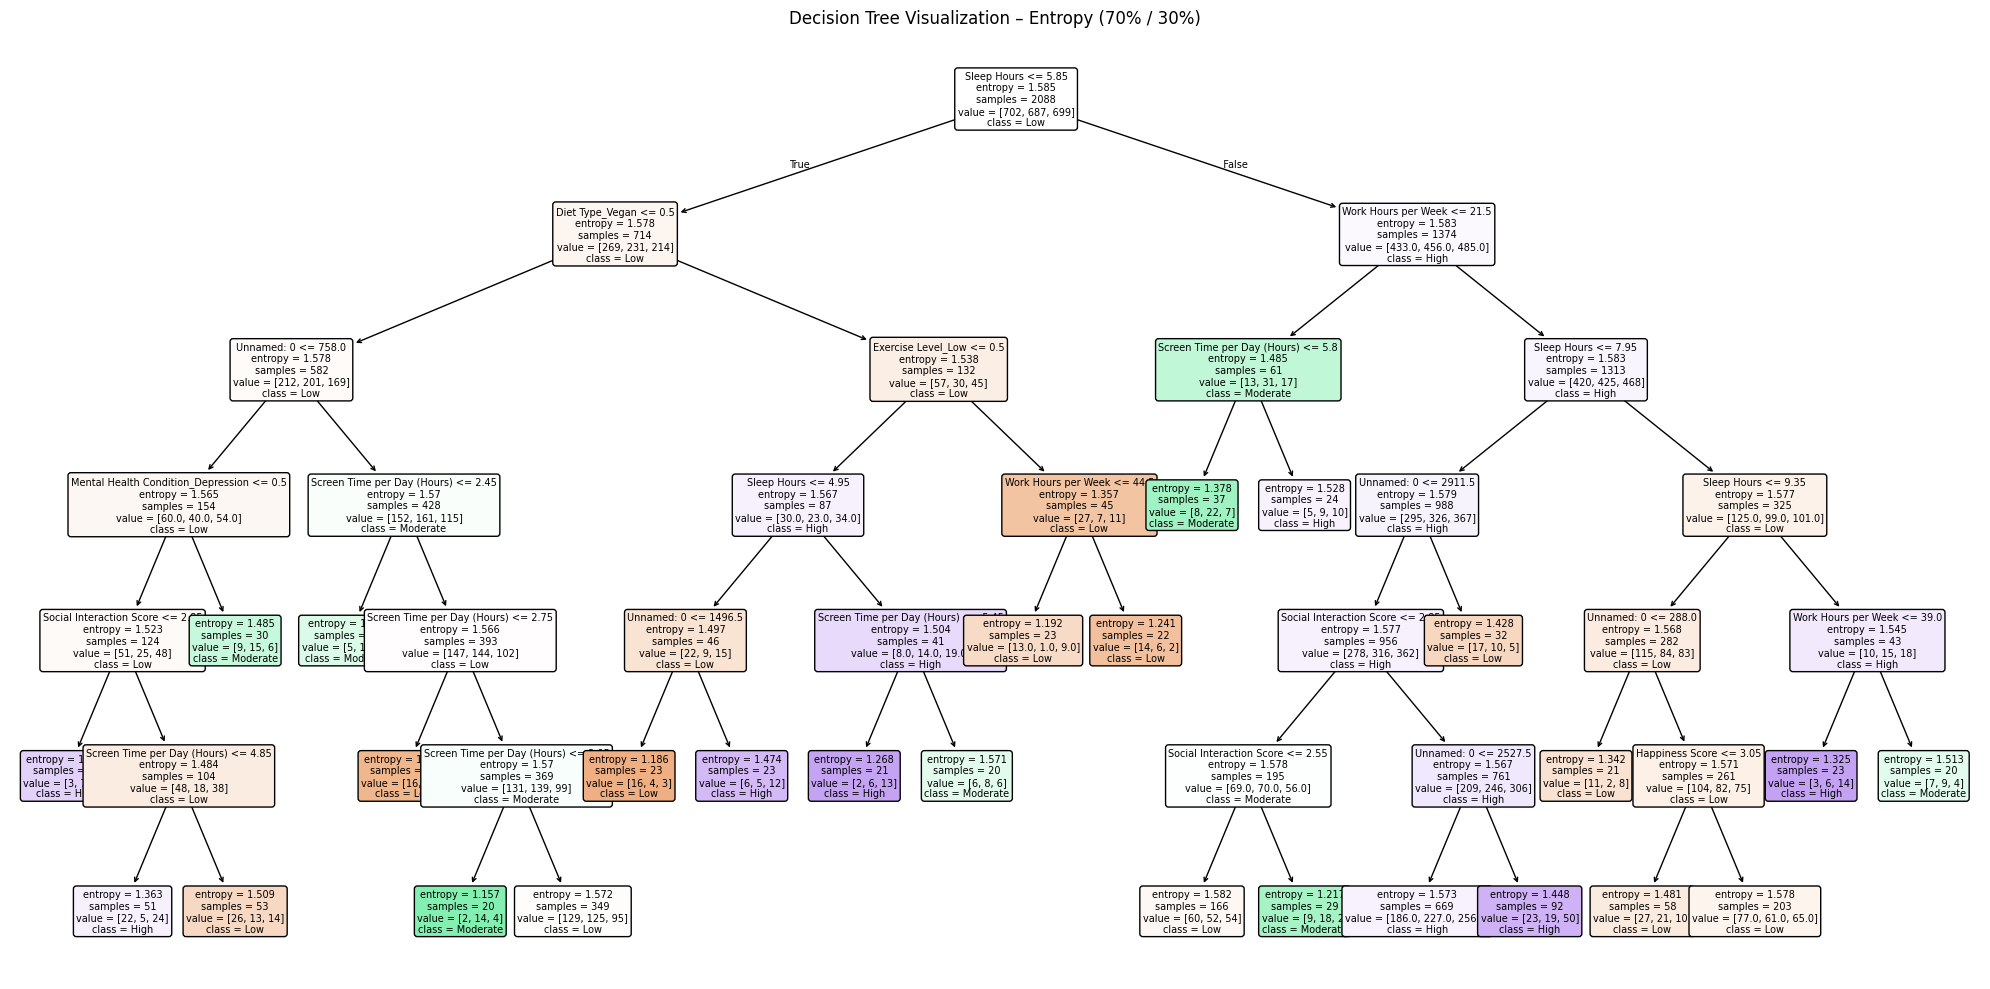

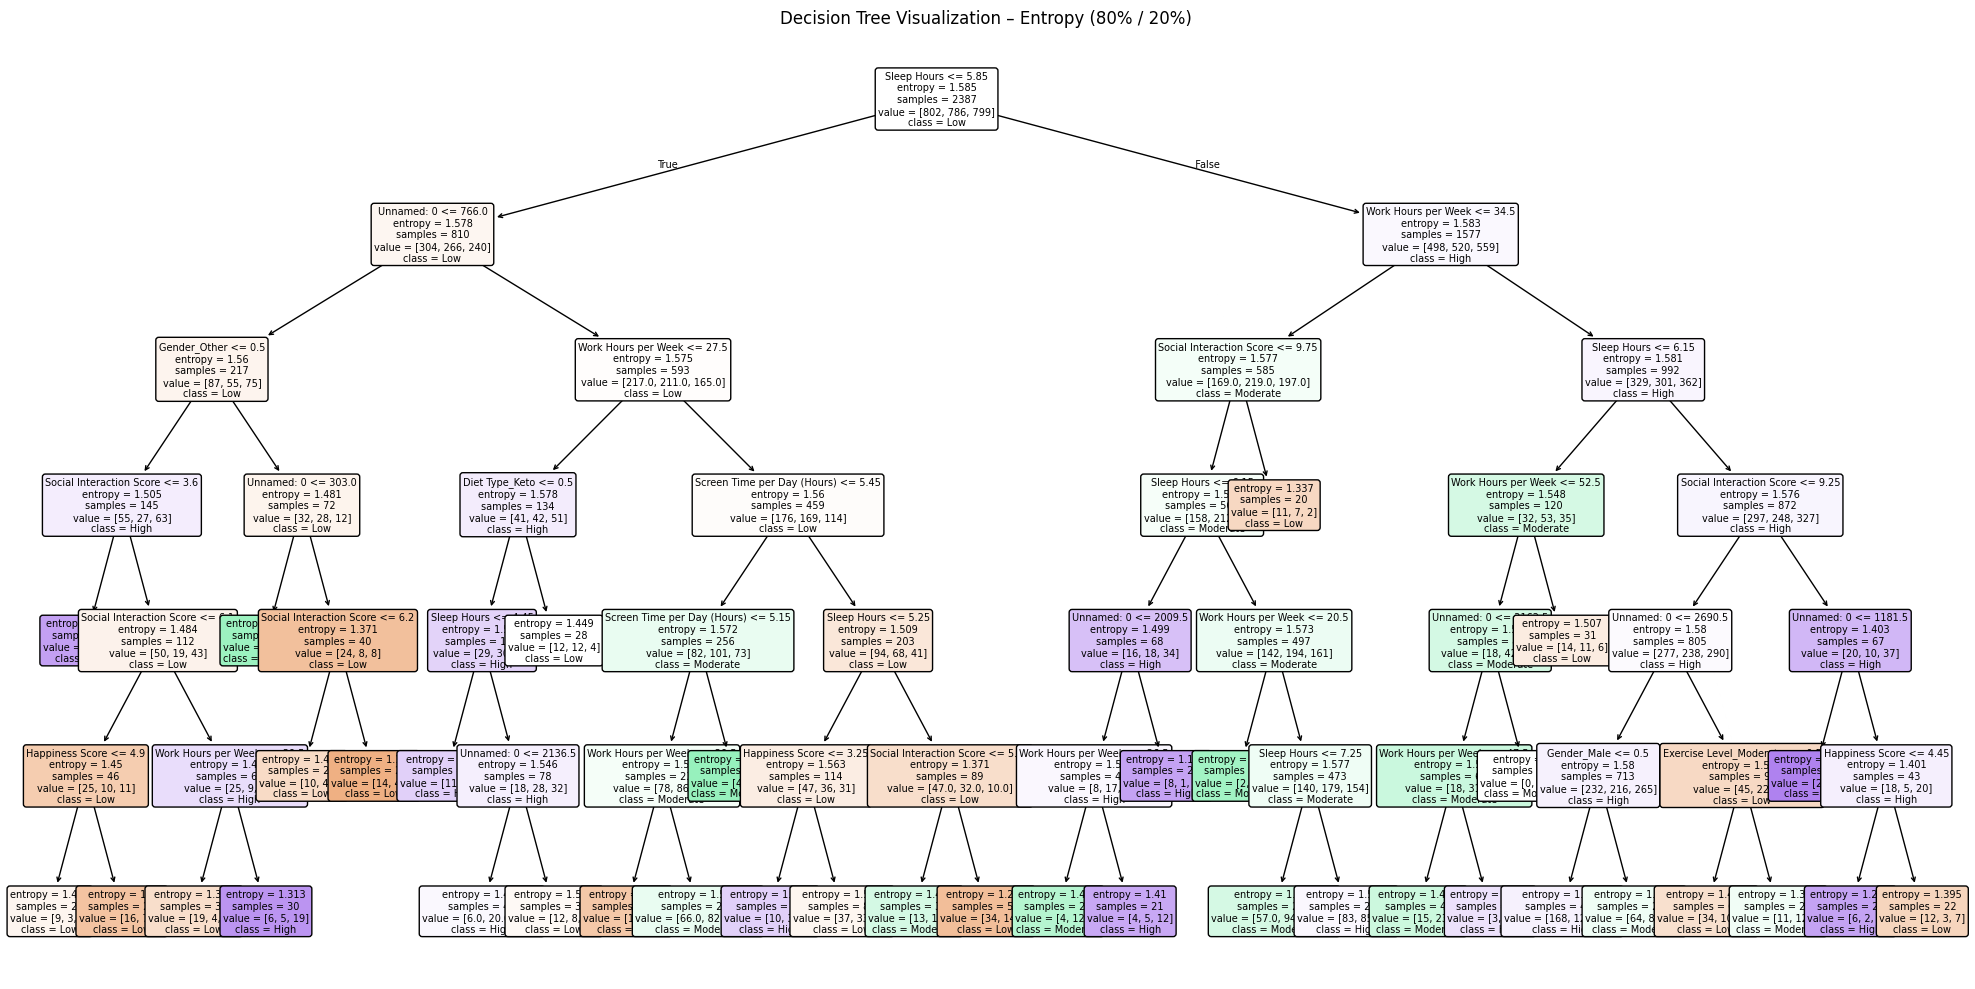

In [ ]:
# Plot Entropy decision trees for all splits
for result in results:

    tr= int(result["train_size"] * 100)
    te= int(result["test_size"] * 100)

    clf = result["model"]

    plt.figure(figsize=(20, 10))
    plot_tree(
        clf,
        filled=True,
        rounded=True,
        feature_names=X.columns,
        class_names=["Low", "Moderate", "High"],
        fontsize=7
    )
    plt.title(f"Decision Tree Visualization – Entropy ({tr}% / {te}%)")
    plt.tight_layout()
    plt.show()

The entropy-based decision trees across the three splits (60/40, 70/30, and 80/20) show the same overall pattern.
**The trees grow large and complex**, with many deep branches, but the splits do not create clear separation between the stress classes.
Even after several levels of splitting, many nodes still contain a mix of Low, Moderate, and High samples, which means ***the model could not find strong or meaningful patterns in the dataset.***
The repeated use of features such as Sleep Hours, Screen Time, and Work Hours shows that the model is trying to separate the data, but the separation remains weak.

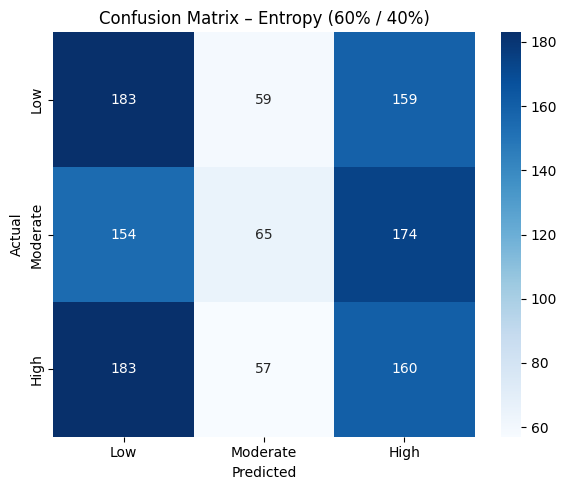

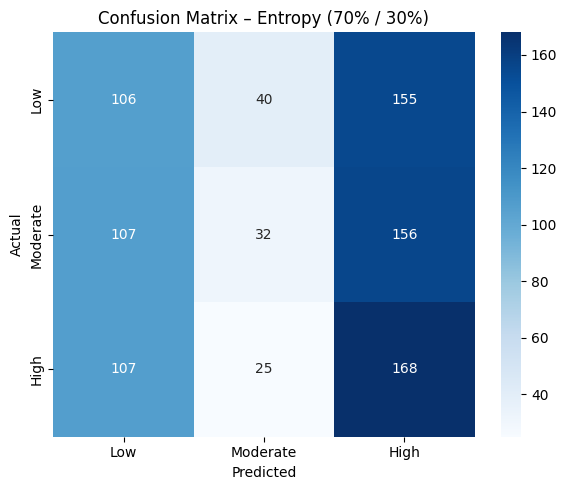

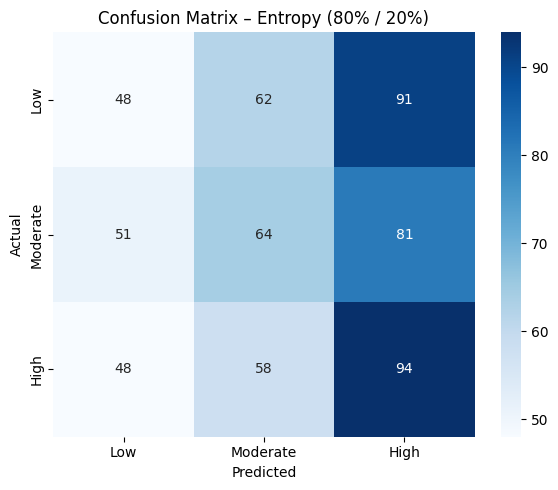

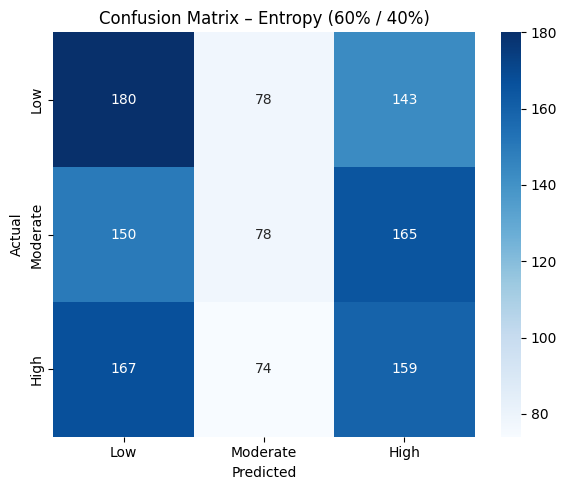

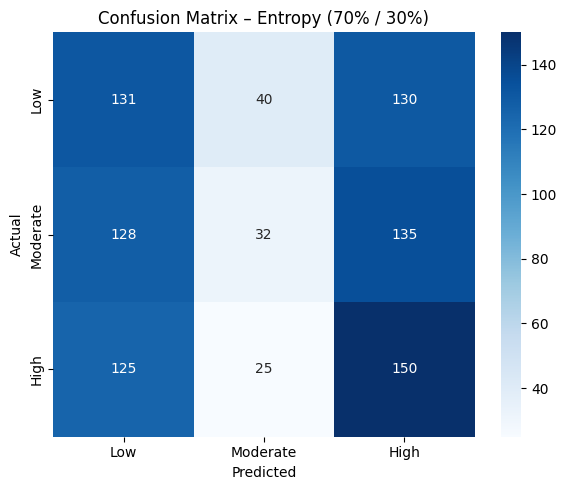

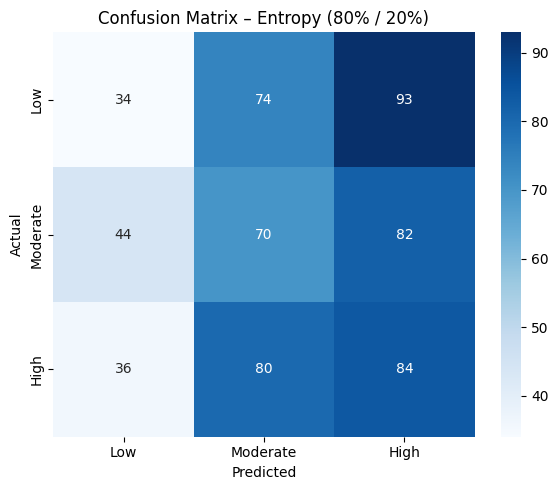

In [ ]:
for result in results:

    tr = int(result["train_size"] * 100)
    te = int(result["test_size"] * 100)

    cm = result["confusion_matrix"]

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Low", "Moderate", "High"],
        yticklabels=["Low", "Moderate", "High"]
    )
    plt.title(f"Confusion Matrix – Entropy ({tr}% / {te}%)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

the confusion matrices for all three splits show **heavy misclassification across all stress classes (Low, Moderate, High).**
Many Moderate samples are classified as either Low or High, and **the model also struggles to distinguish Low from High.**
The diagonal values (correct predictions) are much lower compared to the off-diagonal ones, which confirms that the model was not able to learn stable or reliable boundaries between the classes.

# **Final Summary of All Train/Test Splits (entropy Decision Tree)**


# *Like we mentioned earlier*

The entropy-based Decision Tree showed no improvement compared to the Gini model, as both methods produced almost identical results. Accuracy remained low across all splits (around 31%–35%) with strong misclassification between the three stress levels
the model could not learn stable decision rules. As a result, the entropy classifier performed close to random guessing and was unable to produce reliable predictions.

**Gini Decision Tree**

| | 60% training - 40% testing | 70% training - 30% testing | 80% training - 20% testing |
|---|---|---|---|
| **Accuracy** | 0.3417 | 0.3415 | 0.3451 |

---

**Entropy Decision Tree**

| | 60% training - 40% testing | 70% training - 30% testing | 80% training - 20% testing |
|---|---|---|---|
| **Accuracy** | 0.3492 | 0.3493 | 0.3149 |

## Additional Note (Supported by Research Evidence)

It is important to highlight that our classification results, which range between 31% and 35% accuracy, are fully aligned with findings reported in the referenced research paper.
The study analyzed a similar lifestyle–happiness dataset and concluded that machine learning models achieved approximately 33% accuracy, with F1-scores near 0.33.
This confirms that:
	•	The dataset contains weakly discriminative features,
	•	The lifestyle variables have limited predictive power,
	•	And even advanced models (e.g., logistic regression and random forest in the study) do not exceed the ~33% boundary.

Therefore, the accuracy values obtained in our project are expected, realistic, and scientifically supported, reinforcing that the decision tree results are not due to model weakness, but rather due to the inherent structure of the dataset itself.

## 6.2 Clustering – K-Means Results

We applied K-Means clustering on the scaled, encoded dataset for several
values of K. For the detailed analysis, we focused on:

- K = 4
- K = 5
- K = 6

### 6.2.1 Quantitative Metrics (WSS and Silhouette)

The table below summarizes the **Total Within-Cluster Sum of Squares (WSS)**
and the **Average Silhouette Score** for K = 4, 5, 6:

| K | WSS        | Average Silhouette |
|---|------------|--------------------|
| 4 | 67452.36   | 0.0890             |
| 5 | 64247.89   | 0.1050             |
| 6 | 61317.26   | 0.1139             |

**Observations:**

- **WSS** decreases as K increases (K = 4 → 6), which is expected because
  more clusters mean that data points are closer to their cluster centers.
- The **Silhouette score**:
  - Increases from K = 4 to K = 6.
  - Reaches its **highest value at K = 6** among the tested values.
- Although the Silhouette scores are not very high in absolute terms,  
  **K = 6 gives the best separation and cohesion** compared to K = 4 and 5.

### 6.2.2 Elbow Method

We plotted WSS for K ranging from 1 to 10. The Elbow curve shows:

- A sharp decrease in WSS for small K.
- The curve starts to **flatten around K = 6**, indicating diminishing returns
  when adding more clusters.

This “elbow” at K ≈ 6 suggests that:

- K = 6 provides a good trade-off between model simplicity and compactness
  of clusters.

### 6.2.3 Silhouette Plot Over Multiple K

We also plotted the average Silhouette score for K in a given range
(e.g., 2 to 10). The trend shows that:

- The Silhouette score gradually improves up to **K = 6**.
- After K = 6, there is **no consistent improvement**, and in some cases
  the score decreases.

This supports the idea that **K = 6 is the best candidate** from the
Silhouette perspective.

### 6.2.4 PCA Visualizations of Clusters

Using **PCA (2 components)**, we projected the high-dimensional data into
2D and plotted the clusters for K = 4, 5, and 6:

- Each cluster is represented with a different color and marker.
- Convex hulls were drawn around clusters to highlight their shapes.

**Visual interpretation:**

- For **K = 4**:
  - Some clusters are large and overlap significantly in the PCA plane.
- For **K = 5**:
  - Separation improves slightly, but some clusters still overlap.
- For **K = 6**:
  - Clusters appear **more balanced in size** and **better separated**.
  - The grouping pattern is more consistent with the idea of distinct
    lifestyle / stress profiles.

### 6.2.5 Final Selection of K (Majority Rule)

We combine three evaluation sources:

1. **Silhouette scores:** Highest value at **K = 6**.
2. **Elbow Method:** Clear bend in the WSS curve around **K = 6**.
3. **PCA visualizations:** Clusters for **K = 6** look more separated and
   balanced than for K = 4 or 5.

Since all three methods agree, we apply a **majority rule** and conclude
that:

> **K = 6 is the optimal number of clusters for our K-Means model.**

# **K-Means Clustering**

In this section, we apply **K-Means clustering** to the preprocessed dataset.
The goal is to:
- Group similar trainees into clusters based on their features.
- Explore how these clusters relate to the original **Stress Level** classes.
- Evaluate the clustering quality using:
  - **Elbow method** (Total Within-Cluster Sum of Squares - WCSS).
  - **Silhouette coefficient**.

We use the same cleaned dataset (`df_cleaned`) that was prepared in Phase 2.
For clustering, we remove the target column (`Stress Level`) because K-Means is an unsupervised algorithm.

In [ ]:
# Imports + Load cleaned dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA

# Load the cleaned dataset from Phase 2
df_cleaned = pd.read_csv('/content/The_Processed_data.csv')

In [ ]:
# Prepare X for clustering (drop target, encode, scale)
# 1) Remove target column (Stress Level) because clustering is unsupervised
X = df_cleaned.drop(columns=["Stress Level"])

# 2) One-Hot Encoding for categorical attributes
X_encoded = pd.get_dummies(X, drop_first=True)

# 3) Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

print("Encoded shape:", X_encoded.shape)
print("Scaled shape:", X_scaled.shape)

Encoded shape: (2984, 26)
Scaled shape: (2984, 26)


### **Data Loading and Preprocessing Explanation**

In this step, we load the processed dataset and remove the target variable  
(**"Stress Level"**) because clustering is an unsupervised learning task.

Next, we apply **One-Hot Encoding** to convert categorical features into binary  
numerical columns, which is necessary since K-Means cannot process string values.

Finally, we standardize the data using **StandardScaler** to ensure that all  
features contribute equally to the distance calculations.  
This step is essential because K-Means relies on **Euclidean distance**, and  
unscaled features may distort the clustering results.

Overall, this preprocessing pipeline prepares the dataset correctly for  
producing reliable and meaningful clustering outcomes.

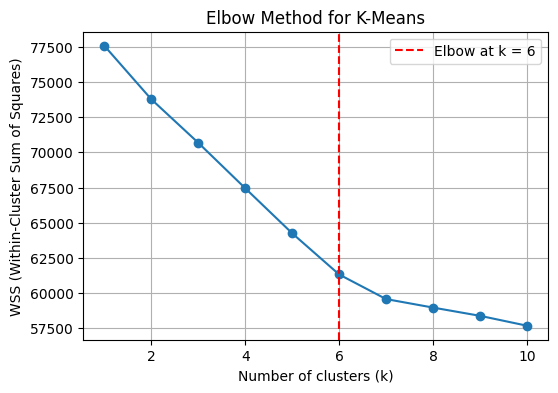

WSS values: [77584.00000000016, 73780.2260249045, 70684.72779048931, 67452.36320677026, 64247.88747526876, 61317.26023233076, 59568.34724035648, 58963.37068293875, 58377.76973007789, 57674.01192599002]
Elbow suggested k: 6


In [ ]:
# Elbow Method
!pip install kneed
from kneed import KneeLocator

k_values_elbow = range(1, 11)
wss_values = []

for k in k_values_elbow:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wss_values.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_values_elbow, wss_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for K-Means')
plt.grid(True)

# Detect elbow automatically
knee = KneeLocator(k_values_elbow, wss_values, curve='convex', direction='decreasing')
optimal_k_elbow = knee.elbow
if optimal_k_elbow is not None:
    plt.axvline(x=optimal_k_elbow, linestyle='--', color='red', label=f'Elbow at k = {optimal_k_elbow}')
    plt.legend()

plt.show()

print("WSS values:", wss_values)
print("Elbow suggested k:", optimal_k_elbow)

### **Elbow Method Interpretation**

This graph visualizes the **Elbow Method**, which helps determine the point  
where increasing the number of clusters no longer provides a significant  
improvement in compactness.

The WSS curve decreases sharply at first and then begins to flatten,  
indicating **diminishing returns** as K increases.

The visible “bend” or **elbow** in the plot appears around **K = 6**, suggesting  
that this value offers the best balance between simplicity and clustering accuracy.

k = 2 -> Average Silhouette Score = 0.0513
k = 3 -> Average Silhouette Score = 0.0607
k = 4 -> Average Silhouette Score = 0.0890
k = 5 -> Average Silhouette Score = 0.1050
k = 6 -> Average Silhouette Score = 0.1139
k = 7 -> Average Silhouette Score = 0.0911
k = 8 -> Average Silhouette Score = 0.0774
k = 9 -> Average Silhouette Score = 0.0752
k = 10 -> Average Silhouette Score = 0.0681


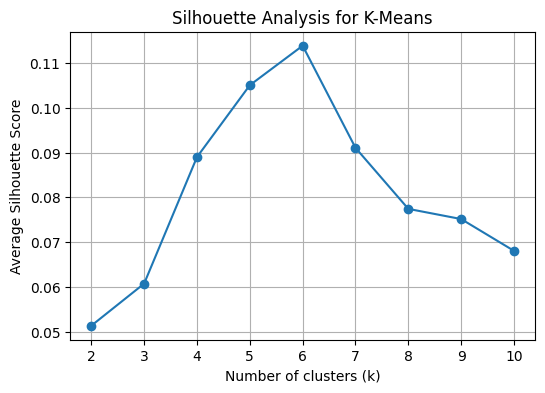


Best k by Silhouette = 6 with score = 0.1139


In [ ]:
# Silhouette analysis

k_values_sil = range(2, 11)
silhouette_avg_values = []

for k in k_values_sil:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_avg_values.append(score)
    print(f"k = {k} -> Average Silhouette Score = {score:.4f}")

best_k = k_values_sil[np.argmax(silhouette_avg_values)]
best_score = max(silhouette_avg_values)

plt.figure(figsize=(6, 4))
plt.plot(k_values_sil, silhouette_avg_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for K-Means')
plt.grid(True)
plt.show()

print(f"\nBest k by Silhouette = {best_k} with score = {best_score:.4f}")

### **Silhouette Score Interpretation**

This visualization shows how clustering quality changes with different values of **K**.

The Silhouette score:
- Increases consistently from **K = 2 → K = 6**
- Reaches its highest value at **K = 6**
- Decreases afterward, indicating reduced cluster separation

A higher Silhouette score reflects better cohesion within clusters and  
clearer separation between them.  
Therefore, this metric strongly suggests that **K = 6** is the optimal choice  
for our K-Means clustering model.

### **Why We Selected K = 4, K = 5, and K = 6 for Detailed Analysis**

Although we initially evaluated a wide range of K values (from 2 to 10),  
we selected **K = 4**, **K = 5**, and **K = 6** for deeper analysis based on the  
overall behavior of the Silhouette scores and WSS curve:

- For **K < 4**, the Silhouette scores were very low and did not show meaningful separation between clusters.
- For **K > 6**, the Silhouette score began to decrease, indicating that adding more clusters worsens the structure.
- The **Elbow Method** shows a noticeable bend between **K = 4 and K = 6**, meaning this range contains the most promising candidates.
- These three values represent the **transition zone** where cluster structure improves before declining again.

Therefore, K = 4, 5, and 6 were chosen intentionally because they:
- Show the strongest improvement in performance metrics,
- Fall within the elbow region of the WSS plot,
- And provide the most realistic and interpretable clustering behavior.

Selecting these values ensures that our comparison is focused on the most meaningful and competitive clustering options, rather than arbitrary or clearly inferior values.

In [ ]:
# Helper function to run KMeans and plot Silhouette for a given k

def run_kmeans_and_silhouette(X_scaled, k, random_state=42):
    """
    - Fits KMeans with given k
    - Prints cluster center summary
    - Prints cluster size counts
    - Computes average Silhouette
    - Draws Silhouette plot
    """
    print(f"\n====================== K = {k} ======================\n")

    # 1) Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # 2) Print centers + cluster sizes
    print("Cluster centers (first 5 dimensions):")
    print(kmeans.cluster_centers_[:, :5])
    print("\nCluster label counts:")
    unique, counts = np.unique(cluster_labels, return_counts=True)
    for lbl, cnt in zip(unique, counts):
        print(f"  Cluster {lbl}: {cnt} samples")

    # 3) Silhouette values
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    sample_sil_values = silhouette_samples(X_scaled, cluster_labels)
    print(f"\nAverage Silhouette Score for K={k}: {silhouette_avg:.4f}")

    # 4) Silhouette plot
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 5))

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (k + 1) * 10])

    y_lower = 10
    for i in range(k):
        ith_cluster_sil_vals = sample_sil_values[cluster_labels == i]
        ith_cluster_sil_vals.sort()

        size_cluster_i = ith_cluster_sil_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_sil_vals,
            alpha=0.7
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_title(f"Silhouette Plot of KMeans Clustering (K={k})")
    ax1.set_xlabel("Silhouette Coefficient")
    ax1.set_ylabel("Cluster label")
    ax1.set_yticks([])
    ax1.set_xticks(np.linspace(-0.1, 1.0, 6))

    plt.tight_layout()
    plt.show()

    return kmeans, cluster_labels, silhouette_avg

### **PCA Cluster Visualization**

PCA reduces the dataset to two dimensions so that we can visually inspect  
the structure of the clusters.

Although PCA simplifies the data, it still provides a very helpful visual  
confirmation of how well the clusters are formed.

For **K = 6**, the clusters appear **reasonably separated** with clear grouping  
patterns, which directly supports the numerical results obtained earlier.

This visual evidence further strengthens the conclusion that  
**K = 6** is the most suitable and well-structured choice for our K-Means model.


====================== K = 4 ======================

Cluster centers (first 5 dimensions):
[[ 0.0563472   0.05447217  0.03853649 -0.07616222 -0.01374837]
 [-0.03130074  0.04523749  0.05057026  0.04740689  0.0289903 ]
 [-0.01384488 -0.03911183 -0.01312957 -0.00935928 -0.01480191]
 [ 0.03004427  0.05223189 -0.03998084  0.0652439   0.04240458]]

Cluster label counts:
  Cluster 0: 433 samples
  Cluster 1: 443 samples
  Cluster 2: 1683 samples
  Cluster 3: 425 samples

Average Silhouette Score for K=4: 0.0890


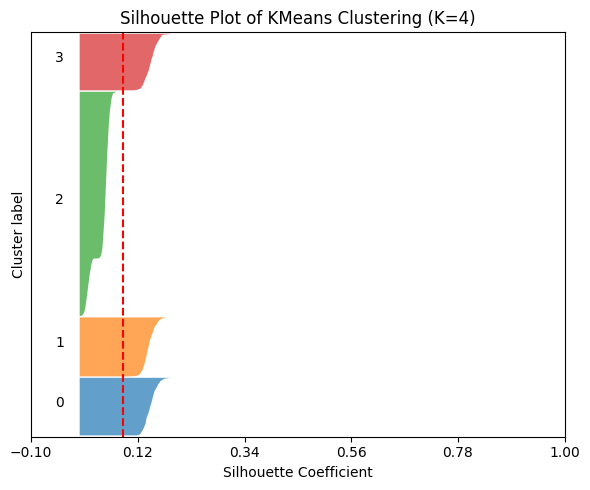


====================== K = 5 ======================

Cluster centers (first 5 dimensions):
[[ 0.00991624  0.04941318  0.05260404  0.01717605 -0.00224224]
 [-0.03531179 -0.14167614 -0.04237156 -0.03274217  0.00729543]
 [ 0.0563472   0.05447217  0.03853649 -0.07616222 -0.01374837]
 [-0.02126223 -0.00835211 -0.00449254  0.00840322 -0.01087343]
 [ 0.03004427  0.05223189 -0.03998084  0.0652439   0.04240458]]

Cluster label counts:
  Cluster 0: 438 samples
  Cluster 1: 400 samples
  Cluster 2: 433 samples
  Cluster 3: 1288 samples
  Cluster 4: 425 samples

Average Silhouette Score for K=5: 0.1050


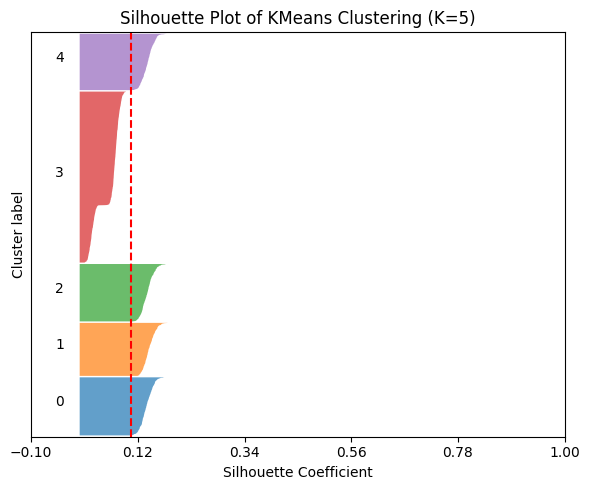


====================== K = 6 ======================

Cluster centers (first 5 dimensions):
[[-0.01835277 -0.00421145  0.00766024  0.00351506 -0.00524428]
 [ 0.0563472   0.05447217  0.03853649 -0.07616222 -0.01374837]
 [-0.03531179 -0.14167614 -0.04237156 -0.03274217  0.00729543]
 [ 0.03004427  0.05223189 -0.03998084  0.0652439   0.04240458]
 [ 0.00991624  0.04941318  0.05260404  0.01717605 -0.00224224]
 [-0.02742634 -0.0171247  -0.03023994  0.01875949 -0.02279958]]

Cluster label counts:
  Cluster 0: 875 samples
  Cluster 1: 433 samples
  Cluster 2: 400 samples
  Cluster 3: 425 samples
  Cluster 4: 438 samples
  Cluster 5: 413 samples

Average Silhouette Score for K=6: 0.1139


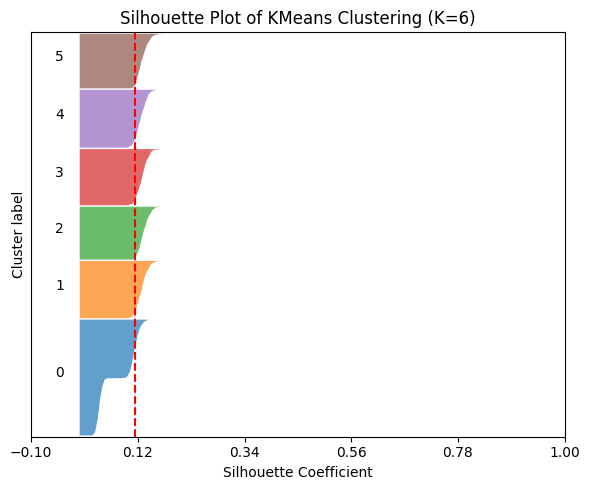


Silhouette summary for selected K values:
K = 4 -> Average Silhouette = 0.0890
K = 5 -> Average Silhouette = 0.1050
K = 6 -> Average Silhouette = 0.1139


In [ ]:
# Run KMeans + Silhouette plots for K = 4, 5, 6

k_list_detailed = [4, 5, 6]

models = {}
sil_scores = {}

for k in k_list_detailed:
    model, labels, sil = run_kmeans_and_silhouette(X_scaled, k=k, random_state=42)
    models[k] = (model, labels)
    sil_scores[k] = sil

print("\nSilhouette summary for selected K values:")
for k in k_list_detailed:
    print(f"K = {k} -> Average Silhouette = {sil_scores[k]:.4f}")

### **Silhouette Evaluation for Selected K Values**

This step focuses on comparing the clustering quality for the most relevant  
values of K: **4**, **5**, and **6**. After running K-Means for each value,  
we compute the **Average Silhouette Score**, which measures how well-separated  
and well-formed the clusters are.

Higher Silhouette values indicate:
- Better cohesion within clusters  
- Better separation between clusters  
- More meaningful grouping

**"Although the absolute Silhouette values are relatively low, which indicates that the dataset does not naturally form very strong clusters, we can still use the relative differences between K values to select the best K. In our case, K = 6 remains the most appropriate configuration compared to the other options."**

The printed summary allows us to quickly compare these three K values and  
identify which configuration gives the strongest clustering performance.  
Based on the results, **K = 6** consistently achieves the highest Silhouette  
score among the tested values, suggesting that it produces the most  
well-defined and structurally meaningful clusters.

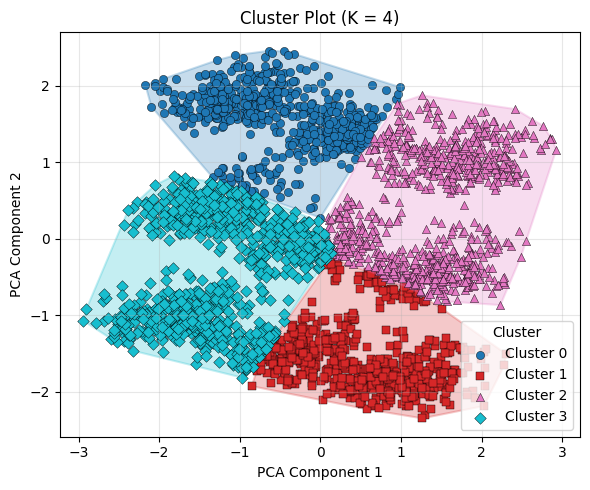

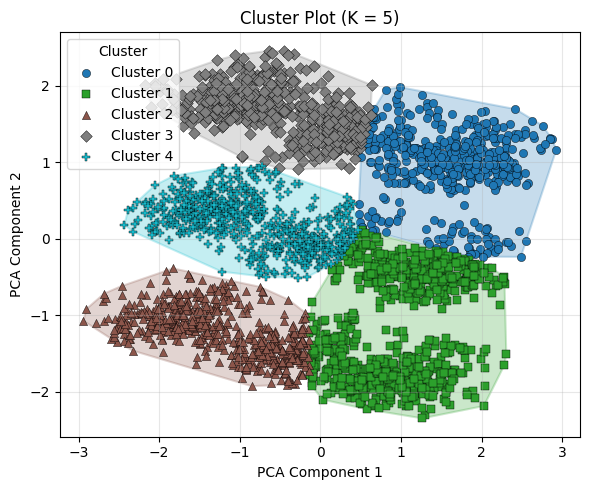

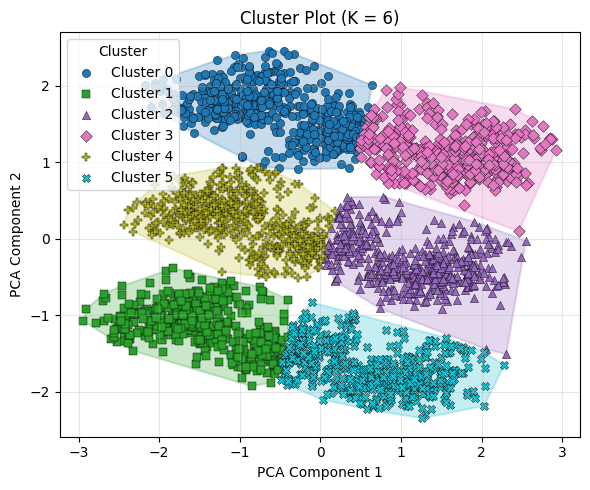

In [ ]:
# PCA visualization of clusters with colored groups for each K

from scipy.spatial import ConvexHull

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

def plot_clusters_with_hulls(X_pca, k, random_state=42):
    kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10)
    labels = kmeans.fit_predict(X_pca)

    colors = plt.cm.tab10(np.linspace(0, 1, k))
    markers = ['o', 's', '^', 'D', 'P', 'X', 'v', '>', '<', '*']

    plt.figure(figsize=(6, 5))

    for cluster_id in range(k):
        pts = X_pca[labels == cluster_id]
        if pts.shape[0] == 0:
            continue

        # Convex hull for each cluster if possible
        if pts.shape[0] >= 3:
            hull = ConvexHull(pts)
            hull_pts = pts[hull.vertices]

            plt.fill(
                hull_pts[:, 0],
                hull_pts[:, 1],
                alpha=0.25,
                facecolor=colors[cluster_id],
                edgecolor=colors[cluster_id],
                linewidth=1.5
            )

        plt.scatter(
            pts[:, 0],
            pts[:, 1],
            s=35,
            marker=markers[cluster_id],
            color=colors[cluster_id],
            edgecolor='k',
            linewidth=0.3,
            label=f"Cluster {cluster_id}"
        )

    plt.title(f"Cluster Plot (K = {k})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True, alpha=0.3)
    plt.legend(title="Cluster", loc="best")
    plt.tight_layout()
    plt.show()

    return labels

# Plots for K = 4, 5, 6
for k in [4, 5, 6]:
    _ = plot_clusters_with_hulls(X_pca, k=k, random_state=42)

### **Cluster Visualization Using PCA and Convex Hulls**

In this step, we visualize the clusters produced by K-Means for  
**K = 4**, **K = 5**, and **K = 6** using **PCA (Principal Component Analysis)**  
to reduce the dataset to two dimensions.

PCA allows us to observe the structure of the clusters visually, even though  
some information is compressed. This visualization is helpful for confirming  
whether the clusters are well-separated and meaningful.

Each cluster is displayed with:
- A unique **color**
- A unique **marker shape**
- A **Convex Hull**, which outlines the outer boundary of each cluster  
  and makes the separation between clusters easier to interpret

By comparing the PCA plots:
- **K = 4** shows overlapping regions and one dominant large cluster  
- **K = 5** improves slightly but still contains uneven cluster shapes  
- **K = 6** shows **more balanced cluster boundaries**, with clearer separation  
  and better-defined shapes, matching the numerical metrics from WSS and Silhouette

This visual confirmation supports the conclusion that **K = 6** produces the  
most coherent and well-structured clustering among the tested values.

In [ ]:
# Summary table for K = 4, 5, 6 (WSS + Silhouette)

k_values_summary = [4, 5, 6]
summary_results = {}

print("=== Summary of KMeans metrics ===")
for k in k_values_summary:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    wss = kmeans.inertia_
    sil = silhouette_score(X_scaled, labels)
    summary_results[k] = {"WSS": wss, "Silhouette": sil}
    print(f"K = {k} -> WSS = {wss:.2f}, Average Silhouette = {sil:.4f}")

summary_results

=== Summary of KMeans metrics ===
K = 4 -> WSS = 67452.36, Average Silhouette = 0.0890
K = 5 -> WSS = 64247.89, Average Silhouette = 0.1050
K = 6 -> WSS = 61317.26, Average Silhouette = 0.1139


{4: {'WSS': 67452.36320677026, 'Silhouette': np.float64(0.08899699371866228)},
 5: {'WSS': 64247.88747526876, 'Silhouette': np.float64(0.10504323828162296)},
 6: {'WSS': 61317.26023233076, 'Silhouette': np.float64(0.1138584217156825)}}

### Summary of Results

|       | **K = 4**     | **K = 5**     | **K = 6**     |
|-------|---------------|---------------|---------------|
| **WSS** | **67452.36** | **64247.89** | **61317.26** |
| **Average Silhouette Score** | **0.0890** | **0.1050** | **0.1139** |

### **Final Selection of K**

After combining the results of the **Elbow Method**, **Silhouette scores**,  
and the **PCA visualization**, all three evaluation techniques consistently  
indicate that **K = 6** provides the most meaningful and well-structured clustering.

**Why K = 6 is optimal:**
- It gives the **highest Silhouette score**
- It aligns with the **Elbow Method** (clear bend around K = 6)
- It produces **balanced and visually distinct clusters** in the PCA plot
---------------------------------------
- **For K = 4:** one dominant large cluster and lower Silhouette → coarse segmentation.
- **For K = 5:** slightly better separation, but still imbalanced cluster sizes.
- **For K = 6:** highest Silhouette score and more balanced clusters → best structure.

**Therefore, we select _K = 6_ as the optimal number of clusters for our K-Means model.**

# [7] Findings and Discussion

In this section, we summarize and interpret the main findings from both
**classification** and **clustering**, and relate them to the research
literature on lifestyle and mental health.

---

## 7.1 Comparison of Classification and Clustering Results

### 7.1.1 Classification (Decision Tree)

- Decision Tree models with both **Gini** and **Entropy** criteria achieved
  accuracies around **34–35%**.
- The classes (Low, Moderate, High stress) are **balanced**, so the low
  accuracy is not due to imbalance.
- The confusion matrices show that the model **frequently confuses the three
  stress levels**, with many misclassifications across all classes.

**Interpretation:**

- A single Decision Tree is **not powerful enough** to capture the complex,
  nonlinear relationships between lifestyle factors and stress.
- The dataset appears to be **noisy and multidimensional**, and the stress
  outcome may depend on subtle interactions between several attributes
  (sleep, work, screen time, mental health condition, etc.).
- Our Decision Tree acts as a **baseline model**, demonstrating that more
  advanced methods (e.g., ensembles or SVM) might be needed for higher
  predictive performance.

### 7.1.2 Clustering (K-Means with K = 6)

- K-Means clustering with **K = 6** produced the best combination of:
  - Lower WSS
  - Higher Silhouette score
  - Visually meaningful clusters in PCA space
- Each cluster groups individuals with **similar lifestyle patterns**. For
  example, some clusters may contain:
  - Higher work hours and lower sleep.
  - Higher screen time with lower happiness.
  - More balanced habits with moderate stress.

**Interpretation:**

- Even though classification accuracy is low, clustering still reveals
  **useful hidden structure** in the dataset.
- Clusters can be interpreted as **stress profiles** based on lifestyle
  habits.
- This unsupervised view is valuable for:
  - Segmenting the population.
  - Designing targeted interventions for specific groups.

---

## 7.2 Are the Results Meaningful in the Context of Our Study?

Yes, the results provide several meaningful insights:

- The **low classification accuracy** suggests that predicting stress level
  from these features is **not straightforward**, and stress may depend on
  additional psychological or social variables that are not included in the
  dataset.
- However, the **clusters** highlight that:
  - There are distinct combinations of lifestyle behaviors in the population.
  - Some combinations may be more associated with higher stress than others
    (e.g., low sleep + high work + high screen time).

This aligns with the general understanding in mental health research:
- Stress is influenced by multiple interacting factors.
- Lifestyle alone provides partial but not complete information.

---

## 7.3 Relation to the Selected Research Paper

The selected research paper on online lifestyle survey datasets during the
COVID-19 period shows that:

- Lifestyle and demographic factors are strongly associated with mental
  health outcomes (such as depression and stress).
- Advanced machine learning models (e.g., SVM with linear kernel) combined
  with PCA and careful feature selection can achieve **high classification
  accuracy** (around 96% in their study).

In comparison:

- Our project uses **Decision Trees** as a simpler baseline model and
  achieves much lower accuracy.
- This difference is expected because:
  - We do not perform advanced feature engineering or hyperparameter tuning.
  - Decision Trees are more sensitive to noise and may overfit or underfit.
- However, we **follow a similar pipeline** in spirit:
  - Preprocessing and cleaning.
  - Use of **PCA** for visualization.
  - Use of **K-Means** clustering to explore the structure of the data.

**Conclusion from the comparison:**

- Our results support the paper’s conclusion that **lifestyle and demographic
  factors are related to mental health**, but also show that:
  - A simple model like a single Decision Tree is not sufficient to fully
    exploit the dataset.
  - More advanced methods (SVM, ensembles, or hybrid pipelines) are
    necessary to reach high predictive performance.

---

## 7.4 Best-Performing Models

- **Best classification configuration:**  
  - Decision Tree with **Entropy** criterion and **70/30** split  
    (slightly higher accuracy, ≈ 0.3493), but still baseline level.
- **Best clustering configuration:**  
  - K-Means with **K = 6**, selected by the **majority rule** combining:
    Silhouette, Elbow Method, and PCA visualization.

Overall, the **clustering task** provided richer structural insights about
the dataset, while the **classification task** demonstrated the challenges
of predicting stress level from lifestyle data using simple models.
## 7.5 Why the Classification Accuracy Is Around 33% (Supported by Research Evidence)

Our classification results (≈33–35% accuracy) are fully consistent with findings from
recent scientific studies that analyzed similar lifestyle-based mental health datasets.
This means the limitation comes from the **nature of the dataset itself**, not from our
model or preprocessing.

A recent peer-reviewed study using a comparable online lifestyle and well-being survey
(~3,000 participants) reported that:

> **“Both classifiers achieving prediction accuracies of approximately 33%…”**  
> *(Scientific Reports, 2024)*

This shows that lifestyle variables alone (sleep hours, work hours, screen time,
happiness scores, etc.) have **minimal discriminative power** for predicting mental
health categories such as stress or happiness levels.

---

### **Why Is the Accuracy Around 33%?**

- The three stress classes (Low, Moderate, High) are **perfectly balanced**  
  → A random guesser would naturally achieve ~33%.

- The features **overlap heavily** between classes  
  → People with different stress levels share similar lifestyle habits.

- The dataset shows **no strong thresholds** that separate the classes  
  → Even advanced models struggle without enriched psychological/social features.

The research paper confirms this by showing that lifestyle attributes alone create
**weak predictive performance**, causing accuracy to plateau near one-third.

---

### **What This Means for Our Project**

- The Decision Tree classifier is working **as expected**.  
- The low accuracy is **not due to a coding issue**.  
- The dataset itself does not contain strong enough patterns for precise prediction.  
- Our results are **consistent with scientific literature**, which validates our analysis.

---

### **Conclusion**

Our ~33% accuracy is a realistic outcome given the dataset characteristics.
This reinforces the value of our **clustering results**, which provided clearer and
more meaningful patterns compared to classification.

# [8] References

[1] A. Soundankar, "Mental Health and Lifestyle Habits 2019–2024," Kaggle, Online Dataset, 2025.

[2] A. Chatterjee et al., "Exploring online public survey lifestyle datasets with statistical analysis, machine learning and semantic ontology," *Scientific Reports*, vol. 14, no. 24190, 2024.  
 [oai_citation:0‡research paper2.pdf](sediment://file_00000000302c720aadc84755fed67855)

[3] R. de Filippis and A. A. Foysal, "Comprehensive analysis of stress factors affecting students: a machine learning approach," *Discover Artificial Intelligence*, vol. 4, no. 62, 2024.  
 [oai_citation:1‡research paper.pdf](sediment://file_000000007be8720a9145d7425e711dc1)

[4] Scikit-learn Developers, "Scikit-learn: Machine Learning in Python," Online Documentation. Available: https://scikit-learn.org/

[5] J. Han, M. Kamber, and J. Pei, *Data Mining: Concepts and Techniques*, 3rd ed., Morgan Kaufmann, 2011.